In [1]:
import pandas as pd
import json
import requests
import pickle

## Read in data

### Cocktail recipe data

In [2]:

with open("data/" + "cocktail_db_list.pickle", 'rb') as to_read:
    cocktail_db_list =  pickle.load(to_read)

In [3]:
with open("data/" + "exotic_c_word_list.pickle", 'rb') as to_read:
    exotic_c_word_list =  pickle.load(to_read)


In [4]:
cocktail_db_list

[{'idDrink': '14029',
  'strDrink': "'57 Chevy with a White License Plate",
  'strDrinkAlternate': None,
  'strDrinkES': None,
  'strDrinkDE': None,
  'strDrinkFR': None,
  'strDrinkZH-HANS': None,
  'strDrinkZH-HANT': None,
  'strTags': None,
  'strVideo': None,
  'strCategory': 'Cocktail',
  'strIBA': None,
  'strAlcoholic': 'Alcoholic',
  'strGlass': 'Highball glass',
  'strInstructions': '1. Fill a rocks glass with ice 2.add white creme de cacao and vodka 3.stir',
  'strInstructionsES': None,
  'strInstructionsDE': '1. Füllen Sie ein Rocks Glas mit Eis 2. Geben Sie weiße Creme de Kakao und Wodka hinzu. 3. Umrühren.',
  'strInstructionsFR': None,
  'strInstructionsZH-HANS': None,
  'strInstructionsZH-HANT': None,
  'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/qyyvtu1468878544.jpg',
  'strIngredient1': 'Creme de Cacao',
  'strIngredient2': 'Vodka',
  'strIngredient3': None,
  'strIngredient4': None,
  'strIngredient5': None,
  'strIngredient6': None,
  'strIngre

In [5]:
cocktail_db_df = pd.DataFrame(cocktail_db_list)

In [6]:
cocktail_db_df.columns

Index(['idDrink', 'strDrink', 'strDrinkAlternate', 'strDrinkES', 'strDrinkDE',
       'strDrinkFR', 'strDrinkZH-HANS', 'strDrinkZH-HANT', 'strTags',
       'strVideo', 'strCategory', 'strIBA', 'strAlcoholic', 'strGlass',
       'strInstructions', 'strInstructionsES', 'strInstructionsDE',
       'strInstructionsFR', 'strInstructionsZH-HANS', 'strInstructionsZH-HANT',
       'strDrinkThumb', 'strIngredient1', 'strIngredient2', 'strIngredient3',
       'strIngredient4', 'strIngredient5', 'strIngredient6', 'strIngredient7',
       'strIngredient8', 'strIngredient9', 'strIngredient10',
       'strIngredient11', 'strIngredient12', 'strIngredient13',
       'strIngredient14', 'strIngredient15', 'strMeasure1', 'strMeasure2',
       'strMeasure3', 'strMeasure4', 'strMeasure5', 'strMeasure6',
       'strMeasure7', 'strMeasure8', 'strMeasure9', 'strMeasure10',
       'strMeasure11', 'strMeasure12', 'strMeasure13', 'strMeasure14',
       'strMeasure15', 'strImageSource', 'strImageAttribution',
   

In [7]:
import copy
reordered_cols = copy.deepcopy(cocktail_db_df.columns)
reordered_cols = [cocktail_db_df.columns[1],cocktail_db_df.columns[0]]
reordered_cols.extend(cocktail_db_df.columns[2:])
reordered_cols
cocktail_db_df = cocktail_db_df[reordered_cols]
cocktail_db_df

strDrink idDrink strDrinkAlternate  \
0    '57 Chevy with a White License Plate   14029              None   
1                          1-900-FUK-MEUP   15395              None   
2                        110 in the shade   15423              None   
3                  151 Florida Bushwacker   14588              None   
4                             155 Belmont   15346              None   
..                                    ...     ...               ...   
540                        Zizi Coin-coin   14594              None   
541                                Zoksel   15691              None   
542                                Zombie   17241              None   
543                             Zorbatini   16963              None   
544                                 Zorro   15328              None   

    strDrinkES strDrinkDE strDrinkFR strDrinkZH-HANS strDrinkZH-HANT strTags  \
0         None       None       None            None            None    None   
1         None       None       None            None            None    None   
2         None       None       None            None            None    None   
3         None       None       None            None            None    None   
4         None       None       None            None            None    None   
..         ...        ...        ...             ...             ...     ...   
540       None       None       None            None            None    None   
541       None       None       None            None            None    None   
542       None       None       None            None            None    None   
543       None       None       None            None            None    None   
544       None       None       None            None            None    None   

    strVideo  ... strMeasure10 strMeasure11 strMeasure12 strMeasure13  \
0       None  ...         None         None         None         None   
1       None  ...         None         None         None         None   
2       None  ...         None         None         None         None   
3       None  ...         None         None         None         None   
4       None  ...         None         None         None         None   
..       ...  ...          ...          ...          ...          ...   
540     None  ...         None         None         None         None   
541     None  ...         None         None         None         None   
542     None  ...         None         None         None         None   
543     None  ...         None         None         None         None   
544     None  ...         None         None         None         None   

    strMeasure14 strMeasure15 strImageSource strImageAttribution  \
0           None         None           None                None   
1           None         None           None                None   
2           None         None           None                None   
3           None         None           None                None   
4           None         None           None                None   
..           ...          ...            ...                 ...   
540         None         None           None                None   
541         None         None           None                None   
542         None         None           None                None   
543         None         None           None                None   
544         None         None           None                None   

    strCreativeCommonsConfirmed         dateModified  
0                            No  2016-07-18 22:49:04  
1                            No  2016-07-18 22:27:04  
2                            No  2016-02-03 14:51:57  
3                            No  2016-07-18 22:28:43  
4                            No  2016-10-05 12:36:28  
..                          ...                  ...  
540                          No  2017-01-28 16:25:52  
541                          No  2017-01-28 16:28:50  
542                          N

In [8]:
cocktail_db_df[cocktail_db_df['strDrink'] == '11001']

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [9]:
ingr_cols=['strIngredient' + str(i) for i in range(1, 16)]
ct_ing_df = cocktail_db_df[['strDrink', *ingr_cols]]
#ct_ing_df[ct_ing_df.apply(lambda r: r.str.contains('elk', case=False).any(), axis=1)]
ct_ing_df

strDrink  strIngredient1  \
0    '57 Chevy with a White License Plate  Creme de Cacao   
1                          1-900-FUK-MEUP  Absolut Kurant   
2                        110 in the shade           Lager   
3                  151 Florida Bushwacker      Malibu rum   
4                             155 Belmont        Dark rum   
..                                    ...             ...   
540                        Zizi Coin-coin       Cointreau   
541                                Zoksel            Beer   
542                                Zombie             Rum   
543                             Zorbatini           Vodka   
544                                 Zorro         Sambuca   

          strIngredient2              strIngredient3        strIngredient4  \
0                  Vodka                        None                  None   
1          Grand Marnier  Chambord raspberry liqueur  Midori melon liqueur   
2                Tequila                        None                  None   
3              Light rum               151 proof rum   Dark Creme de Cacao   
4              Light rum                       Vodka          Orange juice   
..                   ...                         ...                   ...   
540          Lemon juice                         Ice                 Lemon   
541            Root beer                    Lemonade             Coca-Cola   
542             Gold rum               151 proof rum                Pernod   
543                 Ouzo                        None                  None   
544  Baileys irish cream       White Creme de Menthe                  None   

    strIngredient5   strIngredient6     strIngredient7     strIngredient8  \
0             None             None               None               None   
1       Malibu rum         Amaretto    Cranberry juice    Pineapple juice   
2             None             None               None               None   
3        Cointreau             Milk    Coconut liqueur  Vanilla ice-cream   
4             None             None               None               None   
..             ...              ...                ...                ...   
540           None             None               None               None   
541           7-Up  Creme de Cassis              Lemon               None   
542      Grenadine       Lime Juice  Angostura Bitters               None   
543           None             None               None               None   
544           None             None               None               None   

    strIngredient9 strIngredient10 strIngredient11 strIngredient12  \
0             None            None            None            None   
1             None            None            None            None   
2             None            None            None            None   
3             None            None            None            None   
4             None            None            None            None   
..             ...             ...             ...             ...   
540           None            None            None            None   
541           None            None            None            None   
542           None            None            None            None   
543           None            None            None            None   
544           None            None            None            None   

    strIngredient13 strIngredient14 strIngredient15  
0              None            None            None  
1              None            None            None  
2              None            None            None  
3              None            None            None  
4              None            None            None  
..              ...             ...             ...  
540            None            None            None  
541            None            None            None  
542            None            None            None  
543            None            None            None  
544

#### Clean by checking for bogus substrings

In [10]:
cocktail_db_df[cocktail_db_df.apply(lambda r: r.str.contains(' elk ', case=False).any(), axis=1)] 

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [11]:
ingredient_columns = ['strIngredient' + str(num) for num in range(1,16)]
cocktail_db_df_melt = cocktail_db_df.melt(id_vars='strDrink', value_vars=ingredient_columns)
cocktail_db_df_melt 

strDrink         variable           value
0     '57 Chevy with a White License Plate   strIngredient1  Creme de Cacao
1                           1-900-FUK-MEUP   strIngredient1  Absolut Kurant
2                         110 in the shade   strIngredient1           Lager
3                   151 Florida Bushwacker   strIngredient1      Malibu rum
4                              155 Belmont   strIngredient1        Dark rum
...                                    ...              ...             ...
8170                        Zizi Coin-coin  strIngredient15            None
8171                                Zoksel  strIngredient15            None
8172                                Zombie  strIngredient15            None
8173                             Zorbatini  strIngredient15            None
8174                                 Zorro  strIngredient15            None

[8175 rows x 3 columns]

In [12]:
cocktail_db_df_melt[cocktail_db_df_melt['value'].str.contains('elk',na=False)]

strDrink        variable      value
876  Kiss me Quick  strIngredient2  Apfelkorn

In [13]:
cocktail_db_df_melt = cocktail_db_df_melt[~pd.isnull(cocktail_db_df_melt['value'])]
cocktail_db_df_melt = cocktail_db_df_melt[cocktail_db_df_melt['value']!='']
cocktail_db_df_melt.drop(['variable'], axis=1).reindex()

strDrink           value
0     '57 Chevy with a White License Plate  Creme de Cacao
1                           1-900-FUK-MEUP  Absolut Kurant
2                         110 in the shade           Lager
3                   151 Florida Bushwacker      Malibu rum
4                              155 Belmont        Dark rum
...                                    ...             ...
4977                      Amaretto Liqueur   Food coloring
4991                      Angelica Liqueur           Water
5522                      Amaretto Liqueur       Glycerine
5536                      Angelica Liqueur   Food coloring
6081                      Angelica Liqueur   Food coloring

[2148 rows x 2 columns]

In [14]:
cocktail_ingredients = cocktail_db_df_melt['value'].value_counts()
cocktail_ingredients_df = pd.DataFrame(cocktail_db_df_melt['value'].value_counts()).reset_index()

In [15]:
cocktail_ingredients_df['in_cocktail'] = True
cocktail_ingredients_df.rename(columns={'index':'name'}, inplace=True)

### Curate the generic word list below
These words are removed prior to matching because they make no difference to the match

In [16]:
generic_words = list({' and ', ' de ', ' of', ' sour', 'bitters', 'black ', 'blended', 'brown ', 'coloring', \
                       'cordial', 'creme', 'dry','extract', 'flakes', 'flavoring', 'food', 'fresh', \
                       'green', 'juice','leaf', 'leaves', 'light', 'liqueur', 'mix', 'nectar',\
                       ' of ', 'blended', 'peel', 'pink', 'powdered', 'raw', 'red ', 'root', 'sauce', 'seeds', \
                       'sirup', 'soda', 'sour', 'st.', 'sweetened', 'syrup',  ' water', 'whipped', \
                       'whipped', 'white '})

generic_words = [word.lower() for word in generic_words]


In [17]:
generic_words = sorted(generic_words)
generic_words

[' and ',
 ' de ',
 ' of',
 ' of ',
 ' sour',
 ' water',
 'bitters',
 'black ',
 'blended',
 'brown ',
 'coloring',
 'cordial',
 'creme',
 'dry',
 'extract',
 'flakes',
 'flavoring',
 'food',
 'fresh',
 'green',
 'juice',
 'leaf',
 'leaves',
 'light',
 'liqueur',
 'mix',
 'nectar',
 'peel',
 'pink',
 'powdered',
 'raw',
 'red ',
 'root',
 'sauce',
 'seeds',
 'sirup',
 'soda',
 'sour',
 'st.',
 'sweetened',
 'syrup',
 'whipped',
 'white ']

In [18]:
cocktail_ingredients_df

name  value  in_cocktail
0                Gin    101         True
1              Vodka     94         True
2              Sugar     51         True
3       Orange juice     50         True
4              Lemon     44         True
..               ...    ...          ...
361        Firewater      1         True
362         Cherries      1         True
363        Apfelkorn      1         True
364  Pineapple Syrup      1         True
365        Glycerine      1         True

[366 rows x 3 columns]

### Extract generic words out of cocktail ingredients, and puts to lowercase

In [19]:
def remove_words( s, word_list ):
    s=s.lower()
    for word in word_list:
        s = s.replace(word.lower(), '')
    return s


In [20]:
exotic_cocktail_ingredients = [remove_words(drink_string, generic_words) for drink_string in exotic_c_word_list]
exotic_cocktail_ingredients

['bottle rosé',
 'vodka',
 'blackberry',
 'lime ',
 'honey',
 'lime',
 'raspberry',
 'stberry',
 'ice',
 'ice cubes',
 'vodka',
 'lychee ',
 'orange ',
 'lychee',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'ice',
 'rum',
 'turmeric ',
 'coconut milk',
 'pineapple ',
 'lime ',
 'simple ',
 'pineapple.',
 'ice',
 'rum',
 'dark rum',
 'coconut cream',
 'double cream or whipping cream',
 'pineapple ',
 'dash angostura ',
 'maraschino cherries',
 'pineapple slices',
 'fruit punch',
 'tequila',
 'triple sec (cointreau)',
 'lime ',
 'orange',
 'lime',
 'tequila',
 'triple sec',
 'midori',
 'watermelon ',
 'lemonade']

In [21]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['name'].apply(lambda s: remove_words(s, generic_words))

In [22]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].str.strip()

In [23]:
cocktail_ingredients_df

name  value  in_cocktail ingredient
0                Gin    101         True        gin
1              Vodka     94         True      vodka
2              Sugar     51         True      sugar
3       Orange juice     50         True     orange
4              Lemon     44         True      lemon
..               ...    ...          ...        ...
361        Firewater      1         True  firewater
362         Cherries      1         True   cherries
363        Apfelkorn      1         True  apfelkorn
364  Pineapple Syrup      1         True  pineapple
365        Glycerine      1         True  glycerine

[366 rows x 4 columns]

In [24]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('cherry')]

name  value  in_cocktail         ingredient
26              Cherry     18         True             cherry
35   Maraschino cherry     15         True  maraschino cherry
83       Cherry brandy      6         True      cherry brandy
210     Cherry Heering      2         True     cherry heering
217  Maraschino Cherry      2         True  maraschino cherry
288   Cherry Grenadine      1         True   cherry grenadine
319     Cherry liqueur      1         True             cherry
332       Cherry Juice      1         True             cherry

In [25]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('blueberry')]

name  value  in_cocktail          ingredient
269  Blueberry schnapps      1         True  blueberry schnapps

In [26]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

def alt_lemmatizer( string_ ):
    if len( string_ ) > 4:
        return lemmatizer.lemmatize(string_)
    else:
        return string_

#cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(lambda w: lemmatizer.lemmatize(w))
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(alt_lemmatizer)
alt_lemmatizer('roses')

'rose'

In [27]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient']==' roses']

Empty DataFrame
Columns: [name, value, in_cocktail, ingredient]
Index: []

In [28]:
cocktail_ingredients_df[cocktail_ingredients_df['name']=='Sirup of roses']

name  value  in_cocktail ingredient
282  Sirup of roses      1         True       rose

In [29]:
exotic_cocktail_ingredients_df= pd.DataFrame({'in_cocktail': [True]*len(exotic_cocktail_ingredients),'ingredient': exotic_cocktail_ingredients})

In [30]:
cocktail_ingredients_df = cocktail_ingredients_df.merge(exotic_cocktail_ingredients_df, on=['in_cocktail', 'ingredient'], how='outer')

In [31]:
cocktail_ingredients_df

name  value in_cocktail              ingredient
0      Gin  101.0        True                     gin
1      gin    1.0        True                     gin
2    Vodka   94.0        True                   vodka
3    Vodka   94.0        True                   vodka
4    Sugar   51.0        True                   sugar
..     ...    ...         ...                     ...
406    NaN    NaN        True     maraschino cherries
407    NaN    NaN        True        pineapple slices
408    NaN    NaN        True  triple sec (cointreau)
409    NaN    NaN        True                  midori
410    NaN    NaN        True             watermelon 

[411 rows x 4 columns]

### misc data cleaning

In [32]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('turkey')]    

name  value in_cocktail   ingredient
172  Wild Turkey    4.0        True  wild turkey

In [33]:
cocktail_ingredients_df = cocktail_ingredients_df[cocktail_ingredients_df['name'] !='Wild Turkey']

In [34]:
cocktail_ingredients_df.iloc[250:300,:]

name  value in_cocktail          ingredient
251              Hot Damn    2.0        True            hot damn
252   Dark Creme de Cacao    2.0        True          dark cacao
253          Tomato Juice    2.0        True              tomato
254          Tomato juice    2.0        True              tomato
255          Lillet Blanc    2.0        True        lillet blanc
256              Wormwood    2.0        True            wormwood
257              Rosemary    2.0        True            rosemary
258        Rosemary Syrup    1.0        True            rosemary
259            Pepsi Cola    2.0        True          pepsi cola
260                  Zima    2.0        True                zima
261         Angelica root    2.0        True            angelica
262             Tia maria    2.0        True           tia maria
263        Cherry Heering    2.0        True      cherry heering
264          Bitter lemon    2.0        True        bitter lemon
265    Peachtree schnapps    2.0        True  peachtree schnapps
266              Anisette    2.0        True            anisette
267              Jim Beam    2.0        True            jim beam
268                 Anise    2.0        True               anise
269                 Pisco    2.0        True               pisco
270          Pisang Ambon    2.0        True        pisang ambon
271                  Ouzo    2.0        True                ouzo
272              Iced tea    2.0        True            iced tea
273        Apricot Nectar    1.0        True             apricot
274               Apricot    1.0        True             apricot
275        Rosso Vermouth    1.0        True      rosso vermouth
276    Peppermint extract    1.0        True          peppermint
277        Apple schnapps    1.0        True      apple schnapps
278  Worcestershire Sauce    1.0        True      worcestershire
279  Worcestershire sauce    1.0        True      worcestershire
280           Maple syrup    1.0        True               maple
281               Curacao    1.0        True             curacao
282         Melon liqueur    1.0        True               melon
283         Melon Liqueur    1.0        True               melon
284          Rumple Minze    1.0        True        rumple minze
285               Limeade    1.0        True             limeade
286       Raspberry vodka    1.0        True     raspberry vodka
287         Hot Chocolate    1.0        True       hot chocolate
288         Hot chocolate    1.0        True       hot chocolate
289                Fresca    1.0        True              fresca
290           Celery salt    1.0        True         celery salt
291            Dr. Pepper    1.0        True          dr. pepper
292                   Ale    1.0        True                 ale
293            Grape soda    1.0        True               grape
294           Grape juice    1.0        True               grape
295            Grape Soda    1.0        True               grape
296      Red Chili Flakes    1.0        True               chili
297            Yukon Jack    1.0        True          yukon jack
298            Erin Cream    1.0        True          erin cream
299          Peach brandy    1.0        True        peach brandy
300     Tennessee whiskey    1.0        True   tennessee whiskey

In [35]:
lemmatizer.lemmatize('roses')

'rose'

In [36]:
cocktail_ingredients_df.tail(50)

name  value in_cocktail                      ingredient
361        Vanilla vodka    1.0        True                   vanilla vodka
362         Sarsaparilla    1.0        True                    sarsaparilla
363          Apple cider    1.0        True                     apple cider
364            Tropicana    1.0        True                       tropicana
365        Creme de Mure    1.0        True                            mure
366         Daiquiri mix    1.0        True                        daiquiri
367         Cocoa powder    1.0        True                    cocoa powder
368              Hpnotiq    1.0        True                         hpnotiq
369       demerara Sugar    1.0        True                  demerara sugar
370  Elderflower cordial    1.0        True                     elderflower
371        Licorice root    1.0        True                        licorice
372     Peychaud bitters    1.0        True                        peychaud
373        caramel sauce    1.0        True                         caramel
374     Caramel coloring    1.0        True                         caramel
375           Corn syrup    1.0        True                            corn
376            Soy Sauce    1.0        True                             soy
377       Condensed milk    1.0        True                  condensed milk
378            Firewater    1.0        True                       firewater
379            Apfelkorn    1.0        True                       apfelkorn
380            Glycerine    1.0        True                       glycerine
381                  NaN    NaN        True                     bottle rosé
382                  NaN    NaN        True                           lime 
383                  NaN    NaN        True                           lime 
384                  NaN    NaN        True                           lime 
385                  NaN    NaN        True                       ice cubes
386                  NaN    NaN        True                         lychee 
387                  NaN    NaN        True                         orange 
388                  NaN    NaN        True                          lychee
389                  NaN    NaN        True                          lemon 
390                  NaN    NaN        True                          lemon 
391                  NaN    NaN        True                          lemon 
392                  NaN    NaN        True                  rhubarb stalks
393                  NaN    NaN        True                  rhubarb stalks
394                  NaN    NaN        True              frozen raspberries
395                  NaN    NaN        True              frozen raspberries
396                  NaN    NaN        True                      sugar cane
397                  NaN    NaN        True                      sugar cane
398                  NaN    NaN        True                       turmeric 
399                  NaN    NaN        True                      pineapple 
400                  NaN    NaN        True                      pineapple 
401                  NaN    NaN        True                         simple 
402                  NaN    NaN        True                      pineapple.
403                  NaN    NaN        True                   coconut cream
404                  NaN    NaN        True  double cream or whipping cream
405                  NaN    NaN        True                 dash angostura 
406                  NaN    NaN        True             maraschino cherries
407                  NaN    NaN        True                pineapple slices
408                  NaN    NaN        True          triple sec (cointreau)
409                  NaN    NaN        True                          midori
410                  NaN    NaN        True                     watermelon

In [37]:
cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient']=='', 'ingredient'] = cocktail_ingredients_df['name'].str.lower()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [38]:
cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)
cocktail_ingredients_df

<ipython-input-38-ebc28a40c319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)


name  value in_cocktail         ingredient
397                   NaN    NaN        True         sugar cane
396                   NaN    NaN        True         sugar cane
88          151 proof rum   15.0        True      151 proof rum
141                  7-Up    6.0        True               7-up
142                  7-up    1.0        True               7-up
..                    ...    ...         ...                ...
279  Worcestershire sauce    1.0        True     worcestershire
256              Wormwood    2.0        True           wormwood
245     Yellow Chartreuse    2.0        True  yellow chartreuse
297            Yukon Jack    1.0        True         yukon jack
260                  Zima    2.0        True               zima

[410 rows x 4 columns]

In [39]:

cocktail_ingredients_df=cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient'].shift() != cocktail_ingredients_df['ingredient']]
cocktail_ingredients_df.iloc[250:300, :]


name  value in_cocktail              ingredient
73               Sour mix    9.0        True                sour mix
127      Southern Comfort    8.0        True        southern comfort
376             Soy Sauce    1.0        True                     soy
213            Spiced rum    3.0        True              spiced rum
137                Sprite    6.0        True                  sprite
145          Strawberries    6.0        True               stberries
241    Strawberry liqueur    2.0        True                 stberry
214   Strawberry schnapps    3.0        True        stberry schnapps
4                   Sugar   51.0        True                   sugar
202                 Surge    3.0        True                   surge
96         Sweet and Sour    2.0        True                   sweet
59         Sweet Vermouth   25.0        True          sweet vermouth
163         Tabasco sauce    5.0        True                 tabasco
181                   Tea    4.0        True                     tea
300     Tennessee whiskey    1.0        True       tennessee whiskey
56                Tequila   28.0        True                 tequila
338                 Thyme    1.0        True                   thyme
262             Tia maria    2.0        True               tia maria
253          Tomato Juice    2.0        True                  tomato
164           Tonic water    5.0        True                   tonic
39             Triple sec   36.0        True              triple sec
408                   NaN    NaN        True  triple sec (cointreau)
364             Tropicana    1.0        True               tropicana
398                   NaN    NaN        True               turmeric 
177         Vanilla syrup    1.0        True                 vanilla
155     Vanilla ice-cream    5.0        True       vanilla ice-cream
361         Vanilla vodka    1.0        True           vanilla vodka
57           Dry Vermouth   26.0        True                vermouth
2                   Vodka   94.0        True                   vodka
61                  Water   24.0        True                   water
244            Watermelon    2.0        True              watermelon
410                   NaN    NaN        True             watermelon 
123       Blended whiskey    8.0        True                 whiskey
303                Whisky    1.0        True                  whisky
119              Red wine    9.0        True                    wine
278  Worcestershire Sauce    1.0        True          worcestershire
256              Wormwood    2.0        True                wormwood
245     Yellow Chartreuse    2.0        True       yellow chartreuse
297            Yukon Jack    1.0        True              yukon jack
260                  Zima    2.0        True                    zima

In [40]:
cocktail_ingredients_df.to_csv('cocktail_ingredients.csv')

## Load food dataframe 

In [41]:


foods_df = pd.read_csv('food_sources/foodb_2020_04_07_csv/Food.csv')
foods_df['name']=foods_df['name'].str.lower()
foods_df.head()

id           name                 name_scientific  \
0   1       angelica                Angelica keiskei   
1   2  savoy cabbage  Brassica oleracea var. sabauda   
2   3  silver linden                  Tilia argentea   
3   4           kiwi             Actinidia chinensis   
4   5         allium                          Allium   

                                         description   itis_id  \
0  Angelica is a genus of about 60 species of tal...       NaN   
1  Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2  Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3  The kiwifruit, often shortened to kiwi in many...  506775.0   
4  Allium haematochiton is a species of wild onio...   42634.0   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
1         Savoy cabbage             2.jpg           image/jpeg   
2       Tilia tomentosa             3.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
4  Allium haematochiton             5.jpg           image/jpeg   

   picture_file_size       picture_updated_at  ...  food_type  \
0           111325.0  2012-04-20 09:29:57 UTC  ...     Type 1   
1           155178.0  2012-04-20 09:39:54 UTC  ...     Type 1   
2            56367.0  2012-04-20 09:41:25 UTC  ...     Type 1   
3           110661.0  2012-04-20 09:32:21 UTC  ...     Type 1   
4           341911.0  2012-04-20 09:37:44 UTC  ...     Type 1   

                created_at               updated_at creator_id updater_id  \
0  2011-02-09 00:37:14 UTC  2019-05-14 18:04:13 UTC        NaN        2.0   
1  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
2  2011-02-09 00:37:15 UTC  2019-05-17 16:19:45 UTC        NaN        NaN   
3  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
4  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   

  export_to_afcdb  category  ncbi_taxonomy_id  export_to_foodb  public_id  
0           False  specific          357850.0             True  FOOD00001  
1           False  specific         1216010.0             True  FOOD00002  
2           False  specific               NaN             True  FOOD00003  
3           False  specific            3625.0             True  FOOD00004  
4           False  specific            4678.0             True  FOOD00005  

[5 rows x 23 columns]

### 2. As done with cocktail ingredients, write a routine that streamlines the names of foods in the foods dataframe 

Other than converting to lowercase, this is probably not necessary

In [42]:
foods_df['name']=foods_df['name'].str.lower()
foods_df.sample(50)

id                                               name  \
479   490                                          spirulina   
230   231                               pepper (c. baccatum)   
284   286                                      red king crab   
147   148                                             almond   
573   588                                         common dab   
798   825                                              flour   
18     19                                           tarragon   
884   917                                     nanking cherry   
734   760                                             waffle   
330   336                                   chinese chestnut   
300   303                                              bison   
273   275                                            biscuit   
172   173                               garden tomato (var.)   
891   924  cow milk, pasteurized, vitamin d added, 3.25% fat   
130   131                                            parsley   
986  1019                                        white bread   
962   995                                        green onion   
285   287                                            alfalfa   
437   447                                        opium poppy   
570   585                                              charr   
275   277                                             spirit   
871   904                                   green vegetables   
768   794                                      veggie burger   
671   694                      unclassified food or beverage   
199   200                                          mung bean   
869   902                                          beverages   
256   257                                         jostaberry   
754   780                                     other sandwich   
12     13                                               dill   
291   293                                   atlantic herring   
346   352                                         cuttlefish   
52     53                                               lime   
332   338                              garland chrysanthemum   
941   974                                         peanut oil   
828   858                                             pupusa   
596   611                                     rock ptarmigan   
190   191                                 highbush blueberry   
440   450                                             quinoa   
66     67                                              cumin   
806   835                                       french toast   
627   645                                            vinegar   
126   127                                              poppy   
714   739                                            topping   
160   161                                         cloudberry   
700   725                                          snack bar   
556   571                                       spot croaker   
87     88                                             barley   
615   630                                             liquor   
450   461                                        chum salmon   
557   572                                           sourdock   

                            name_scientific  \
479                               Spirulina   
230         Capsicum baccatum var. baccatum   
284              Paralithodes camtschaticus   
147                           Prunus dulcis   
573                         Limanda limanda   
798                                     NaN   
18                    Artemisia dracunculus   
884                        Prunus tomentosa   
734                                     NaN   
330                     Castanea mollissima   
300                             Bison bison   
273                                     NaN   
172  Solanum lycopersicum var. lycopersicum   
891                                     NaN   
130                    Petroselinum c

In [43]:
foods_df.shape

(992, 23)

In [44]:
foods_df.sort_values('id').head(50)

id              name                    name_scientific  \
0    1          angelica                   Angelica keiskei   
1    2     savoy cabbage     Brassica oleracea var. sabauda   
2    3     silver linden                     Tilia argentea   
3    4              kiwi                Actinidia chinensis   
4    5            allium                             Allium   
5    6      garden onion                        Allium cepa   
6    7              leek                      Allium porrum   
7    8            garlic                     Allium sativum   
8    9            chives               Allium schoenoprasum   
9   10     lemon verbena                  Aloysia triphylla   
10  11        cashew nut             Anacardium occidentale   
11  12         pineapple                     Ananas comosus   
12  13              dill                 Anethum graveolens   
13  14     custard apple                  Annona reticulata   
14  15       wild celery                   Apium graveolens   
15  16            peanut                   Arachis hypogaea   
16  17           burdock                      Arctium lappa   
17  18       horseradish                Armoracia rusticana   
18  19          tarragon              Artemisia dracunculus   
19  20           mugwort                 Artemisia vulgaris   
20  21         asparagus              Asparagus officinalis   
21  22               oat                       Avena sativa   
22  23        star fruit                 Averrhoa carambola   
23  24        brazil nut               Bertholletia excelsa   
24  25       common beet                      Beta vulgaris   
25  26            borage                 Borago officinalis   
26  27   chinese mustard                    Brassica juncea   
27  28             swede                     Brassica napus   
28  29              rape          Brassica napus var. napus   
29  30    common cabbage                  Brassica oleracea   
30  31       cauliflower    Brassica oleracea var. botrytis   
31  32   brussel sprouts   Brassica oleracea var. gemmifera   
32  33          kohlrabi  Brassica oleracea var. gongylodes   
33  34          broccoli     Brassica oleracea var. italica   
34  35   chinese cabbage                      Brassica rapa   
35  36            turnip            Brassica rapa var. rapa   
36  37        pigeon pea                      Cajanus cajan   
37  38               tea                  Camellia sinensis   
38  39            capers                   Capparis spinosa   
39  40            pepper                    Capsicum annuum   
40  41            papaya                      Carica papaya   
41  42         safflower               Carthamus tinctorius   
42  43           caraway                        Carum carvi   
43  44         pecan nut                Carya illinoinensis   
44  45          chestnut                           Castanea   
45  46    roman camomile                 Chamaemelum nobile   
46  47          chickpea                    Cicer arietinum   
47  48            endive                  Cichorium endivia   
48  49           chicory                  Cichorium intybus   
49  50  chinese cinnamon              Cinnamomum aromaticum   

                                          description   itis_id  \
0   Angelica is a genus of about 60 species of tal...       NaN   
1   Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2   Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3   The kiwifruit, often shortened to kiwi in many...  506775.0   
4   Allium haematochiton is a species of wild onio...   42634.0   
5   The onion (Allium cepa) (Latin 'cepa' = onion)...   42720.0   
6   The leek is a vegetable that belongs, along wi...   42659.0   
7   With a history of human use of over 7,000 year...   42652.0   
8   Chives is the common name of Allium schoenopra...   42636.0   
9   Aloysia citrodora is a species of flowering pl...   32135.0   
10  The cashew, or caju, is a small tree native to...

### Merge with the 15K-column food table

In [45]:
with open("data/" + "foods_recomb_df.pickle", 'rb') as to_read:
    foods_recomb_df =  pickle.load(to_read)

In [46]:
foods_recomb_df.head()

orig_food_common_name  (E)-2-HEPTENAL_in_Calyx  \
food_id                                                     
1                angelica, fresh                      NaN   
2             savoy cabbage, raw                      NaN   
3           silver linden, dried                      NaN   
4               kiwi, pure juice                      NaN   
5        onions, yellow, sauteed                      NaN   

         (E)-2-HEXENAL_in_Calyx  (Z)-3-HEXENOL_in_Calyx  1,4-CINEOLE_in_Calyx  \
food_id                                                                         
1                           NaN                     NaN                   NaN   
2                           NaN                     NaN                   NaN   
3                           NaN                     NaN                   NaN   
4                           NaN                     NaN                   NaN   
5                           NaN                     NaN                   NaN   

         1,8-CINEOLE_in_Calyx  1-HEXANOL_in_Calyx  \
food_id                                             
1                         NaN                 NaN   
2                         NaN                 NaN   
3                         NaN                 NaN   
4                         NaN                 NaN   
5                         NaN                 NaN   

         2,2-DIMETHYL-HEXANAL_in_Calyx  2-ETHYL-FURAN_in_Calyx  \
food_id                                                          
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   
5                                  NaN                     NaN   

         2-PENTYL-FURAN_in_Calyx  ...  VIT-E_in_Sprout Seedling  \
food_id                           ...                             
1                            NaN  ...                       NaN   
2                            NaN  ...                       NaN   
3                            NaN  ...                       NaN   
4                            NaN  ...                       NaN   
5                            NaN  ...                       NaN   

         ALLANTOIC-ACID_in_Sprout Seedling  \
food_id                                      
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   

         HOMOGENTISINIC-ACID_in_Sprout Seedling  PIPECOLIC-ACID_in_Stem  \
food_id                                                                   
1                                           NaN                     NaN   
2                                           NaN                     NaN   
3                                           NaN                     NaN   
4                                           NaN                     NaN   
5                                           NaN                     NaN   

         NEOGLUCOBRASSICIN_in_Seed  TETRACOSANOIC-ACID_in_Seed Oil  \
food_id                                                              
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   
5                              NaN                             NaN   

         DIOSCIN_in_Root  ADENINE_in_Tuber  PHYTIN_in_Tuber  SUGARS_in_Tuber  
food_id                                                                       
1                    NaN               NaN              NaN              NaN  
2                    NaN               NaN              NaN              NaN  
3                    NaN               NaN            

In [47]:
foods_recomb_df.shape

(907, 15598)

In [48]:
foods_df = pd.merge(foods_df, foods_recomb_df, left_on='id', right_on='food_id', how='outer')

In [49]:
foods_df.shape

(997, 15621)

In [50]:
foods_df.sort_values('food_group').tail(50).iloc[:, :60]

id                      name  \
852   883.0                 mushrooms   
153   154.0            garden rhubarb   
854   885.0   onion-family vegetables   
94     95.0                   lettuce   
232   233.0         pepper (capsicum)   
876   909.0         green bell pepper   
878   911.0        orange bell pepper   
436   445.0         american pokeweed   
899   932.0       asparagus racemosus   
438   448.0            prairie turnip   
331   337.0    chinese water chestnut   
456   467.0            common salsify   
76     77.0       rocket salad (ssp.)   
332   338.0     garland chrysanthemum   
468   479.0           sesbania flower   
225   226.0       garden onion (var.)   
230   231.0      pepper (c. baccatum)   
70     71.0           globe artichoke   
670   693.0   other vegetable product   
487   499.0                      taro   
490   502.0      mexican groundcherry   
71     72.0               wild carrot   
90     91.0             swamp cabbage   
895   928.0         albizia gummifera   
894   927.0        juniperus communis   
879   912.0           red bell pepper   
880   913.0  italian sweet red pepper   
730   756.0         morchella (morel)   
796   823.0                 tree fern   
339   345.0                corn salad   
213   214.0                  celeriac   
91     92.0              sweet potato   
886   919.0             white cabbage   
887   920.0           romaine lettuce   
415   423.0                     nopal   
419   427.0                      okra   
427   436.0    pepper (c. frutescens)   
214   215.0             celery stalks   
892   925.0   castanospermum australe   
893   926.0            gentiana lutea   
877   910.0        yellow bell pepper   
289   291.0                 arrowroot   
989  1022.0                  fish oil   
990  1023.0                taco shell   
991  1024.0             tostada shell   
992     NaN                       NaN   
993     NaN                       NaN   
994     NaN                       NaN   
995     NaN                       NaN   
996     NaN                       NaN   

                                       name_scientific  \
852                                                NaN   
153                                  Rheum rhabarbarum   
854                                                NaN   
94                                      Lactuca sativa   
232                                           Capsicum   
876                                    Capsicum annuum   
878                                    Capsicum annuum   
436                               Phytolacca americana   
899                                Asparagus racemosus   
438                              Pediomelum esculentum   
331                                  Eleocharis dulcis   
456                             Tragopogon porrifolius   
76                         Eruca vesicaria ssp. sativa   
332                           Chrysanthemum coronarium   
468                                 Sesbania bispinosa   
225                              Allium cepa var. cepa   
230                    Capsicum baccatum var. baccatum   
70                                     Cynara scolymus   
670                                                NaN   
487                                Colocasia esculenta   
490             Physalis philadelphica var. immaculata   
71                                       Daucus carota   
90                                    Ipomoea aquatica   
895                                  Albizia gummifera   
894                                 Juniperus communis   
879                                    Capsicum annuum   
880                                    Capsicum annuum   
730                                      Morchellaceae   
796                                            Cyathea   
339                               Valerianella locusta   
213                     Apium graveolens var. rapaceum   
91                                     Ipomoea batatas   
886

In [51]:
foods_df = foods_df[foods_df['id'].notnull()]
#foods_df

### 3. Write a function that can check if any of the words in a string are in the pared down cocktail ingredients word list. It should also mark in the cocktail ingredient ingredients dataframe whether an ingredient is found to match the other dataframe

#### With a better fuzzy word matching algorithm, the following food-item categories would be matched as cocktail ingredients

For now we'll simply link to them if they are included in the food-item

In [52]:
contain_list = ['cinnamon', 'coffee', 'cocoa', 'cow milk',  'milk (cow)', 'liquor', 'blueberry']	

In [53]:
ing_list = ['citrus', 'cloves', 'cocktail', 'common grape', 'eggs', 'grape', 'fruit juice', 'fruit-flavor drink', \
            'fruits', 'garden tomato (var.)', ' horchata', 'horseradish', 'ice cream', 'lichee', \
            'mandarin orange (clementine, tangerine)', 'mango', 'mentha', 'milk (cow)', 'pepper (spice)', \
            'rose hip', 'sake', 'soft drink', 'star anise', 'star fruit', 'strawberry', 'syrup']

In [54]:
exclude_list = ['corn', 'rye', 'sour cream','elk','pea','common pea']

## True/False label assignment
This function below is the heart of the matching process that assigns the **True** vs. **False** label 
to each of the 900 foods

In [55]:
from fuzzywuzzy import fuzz
#def fuzzy_matches()

def is_ingredient( food_item ):
    ## 'corn' and 'rye' arrive here only because 'syrup' and 'whiskey' were systematically removed from 
    ## all ingredient strings at an earlier stage. Additionally 'sour' would below be removed from 'sour cream'
    ## creating another false match. The following 'if' statement avoids all these.
    #if ((food_item == 'corn') | (food_item == 'rye') | (food_item == 'sour cream')|(food_item == 'red rice')):
    if any(s == food_item for s in exclude_list):    
        return False
    
    colors = ['red ', 'black ', 'pink ', 'blue ', 'white ' ]
    for c in colors:
        food_item=food_item.replace(c, '')
    qualifiers  = ['sweet ', 'sour ', 'bitter ']
    for q in qualifiers:
        food_item=food_item.replace(q, '')

    
    
    found = False
    #if (cocktail_ingredients_df['ingredient']).str.eq(food_item).any():
    #if (lemmatizer.lemmatize(cocktail_ingredients_df['ingredient'].str).eq(lemmatizer.lemmatize(food_item)).any()):
    if (cocktail_ingredients_df['ingredient']==food_item).any():
        found = True
    #elif ('cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
    elif (cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
        found = True
    elif ('common ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif ('garden ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.contains(food_item + ' ').any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.startswith(food_item).any():
        found = True
    elif (fuzz.ratio(food_item, (cocktail_ingredients_df['ingredient']).any()) > 60):
        found = True
    elif any(s in food_item for s in contain_list):
        found = True
    elif any(s == food_item for s in ing_list):
        found = True
    
#   elif fuzz.ratio(cocktail_ingredients_df['ingredient']).str.any(), food_item) > 90)
#   elif cocktail_ingredients_df['ingredient'].any() in food_item:
#         found = True                  
    return found

#is_ingredient(foods_df.iloc[11, :]['name'])
#is_ingredient('passion fruit')

In [56]:
is_ingredient('common thyme')

True

In [57]:
#def is_wikipedia_id( wikipedia_id ):
#    if(type(wikipedia_id) is float ):
#        return False
#    #print(type(food_group))
#    #print(food_group.split())
#    elif (cocktail_ingredients_df['ingredient'].isin(wikipedia_id.replace('_', ' ').split()).any()):
#        return True
#    #return False

## 4. Apply the labeling function to populate a new `in_cocktail` column in the foods dataframe

In [58]:
foods_df['in_some_cocktail'] = foods_df['name'].apply(is_ingredient)

#foods_df['in_some_cocktail'] = foods_df['name'].apply(lambda name_string: is_ingredient(name_string))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [59]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [60]:
non_cocktail_foods = foods_df[foods_df['in_some_cocktail']==False]
non_cocktail_foods.sample(50)

id                    name           name_scientific  \
243   244.0            rocket salad           Eruca vesicaria   
483   495.0            white sucker    Catostomus commersonii   
438   448.0          prairie turnip     Pediomelum esculentum   
541   556.0             boysenberry    Rubus ursinus X idaeus   
693   716.0               soy sauce                       NaN   
332   338.0   garland chrysanthemum  Chrysanthemum coronarium   
479   490.0               spirulina                 Spirulina   
375   381.0                hazelnut                   Corylus   
376   382.0             hickory nut                     Carya   
513   525.0           albacore tuna          Thunnus alalunga   
70     71.0         globe artichoke           Cynara scolymus   
659   681.0          fruit preserve                       NaN   
932   965.0       mozzarella cheese                       NaN   
280   282.0                 acerola      Malpighia emarginata   
749   775.0                 hot dog                       NaN   
877   910.0      yellow bell pepper           Capsicum annuum   
311   316.0                 buffalo           Bubalus bubalis   
381   387.0              irish moss          Chondrus crispus   
942   975.0          cottonseed oil                       NaN   
430   439.0           northern pike               Esox lucius   
554   569.0                 maitake          Grifola frondosa   
985  1018.0           lantern fruit        Physalis alkekengi   
73     74.0                cardamom      Elettaria cardamomum   
339   345.0              corn salad      Valerianella locusta   
287   289.0                amaranth                Amaranthus   
129   130.0                 avocado          Persea americana   
68     69.0                  quince           Cydonia oblonga   
957   990.0                plantain        Musa × paradisiaca   
669   692.0                    soup                       NaN   
337   343.0            atlantic cod              Gadus morhua   
894   927.0      juniperus communis        Juniperus communis   
833   863.0        yellow pond-lily              Nuphar lutea   
851   882.0        chinese bayberry              Myrica rubra   
702   727.0            energy drink                       NaN   
366   372.0             ginkgo nuts             Ginkgo biloba   
915   948.0                    mate       Ilex paraguariensis   
745   771.0           tapioca pearl                       NaN   
531   545.0                   squid                  Teuthida   
780   806.0             pie filling                       NaN   
198   199.0               gram bean               Vigna mungo   
331   337.0  chinese water chestnut         Eleocharis dulcis   
403   409.0         malabar spinach              Basella alba   
315   320.0               butternut           Juglans cinerea   
130   131.0                 parsley      Petroselinum crispum   
428   437.0        common persimmon      Diospyros virginiana   
569   584.0                sturgeon             Acipenseridae   
336   342.0             pacific cod       Gadus macrocephalus   
529   542.0                 beefalo  Bos taurus X Bison bison   
813   842.0        multigrain bread                       NaN   
239   240.0         japanese walnut     Juglans ailanthifolia   

                                           description   itis_id  \
243  Eruca sativa (syn. E. vesicaria subsp. sativa ...  502429.0   
483  The white sucker (Catostomus commersonii) is a...  553273.0   
438  Psoralea esculenta (prairie turnip) is an herb...  504177.0   
541  A boysenberry is a cross between a European Ra...       NaN   
693  Soy sauce (also called soya sauce) is a condim...       NaN   
332  The garland chrysanthemum, Chrysanthemum coron...   35796.0   
479  <i>Spirulina</i> represents a biomass of cyano...    1053.0   
375  A hazelnut is the nut of the hazel and is also...   19505.0   
376  Hickory (from Powhatan) is a type of tree, com...   19223.0   
513  The alba

#### Add `wine` and `alcohonic beverages` to items that can go in a cocktail.

In [61]:
non_cocktail_foods[non_cocktail_foods['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
277                                NaN                                    NaN   
853                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
277                    NaN                       NaN   
853                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
277                            NaN             NaN               NaN   
853                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
277              NaN             NaN            False  
853              NaN             NaN            False  

[2 rows x 15622 columns]

In [62]:
foods_df.loc[foods_df['name'].str.contains('alcoholic'),'in_some_cocktail']=True

In [63]:
foods_df[foods_df['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
277                                NaN                                    NaN   
853                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
277                    NaN                       NaN   
853                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
277                            NaN             NaN               NaN   
853                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
277              NaN             NaN             True  
853              NaN             NaN             True  

[2 rows x 15622 columns]

In [64]:
foods_df.loc[foods_df['name'].str.contains('fermented'), 'in_some_cocktail'] = True

In [65]:
foods_df.loc[foods_df['food_subgroup'].str.contains('Distilled', na=False), 'in_some_cocktail'] = True

In [66]:
foods_df.loc[foods_df['name'].str.contains('fermented'),'in_some_cocktail']=True

In [67]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [68]:
foods_df.loc[foods_df['name'].str.contains('wine'),'in_some_cocktail']=True
foods_df[foods_df['name'].str.contains('wine')]

id            name name_scientific  \
276  278.0  fortified wine             NaN   
611  626.0      grape wine             NaN   
612  627.0      berry wine             NaN   
613  628.0      other wine             NaN   
629  647.0       port wine             NaN   
632  650.0    madeira wine             NaN   
910  943.0        red wine             NaN   
916  949.0      white wine             NaN   
919  952.0       rosé wine             NaN   
922  955.0    dessert wine             NaN   

                                           description  itis_id  \
276  Fortified wine is wine with an added distilled...      NaN   
611  Wine is an alcoholic beverage made from fermen...      NaN   
612                                                NaN      NaN   
613                                                NaN      NaN   
629  Port wine (also known as Vinho do Porto, Portu...      NaN   
632  Madeira is a fortified Portuguese wine made in...      NaN   
910  Red wine is a type of wine made from dark-colo...      NaN   
916  White wine is a wine that is fermented without...      NaN   
919  Rosé wine is a kind of wine. It is made from r...      NaN   
922  Dessert wines, sometimes called pudding wines,...      NaN   

       wikipedia_id picture_file_name picture_content_type  picture_file_size  \
276  Fortified wine           278.jpg           image/jpeg            40686.0   
611      Grape_wine           626.jpg           image/jpeg            24988.0   
612             NaN           627.jpg           image/jpeg            16358.0   
613             NaN           628.jpg           image/jpeg            55077.0   
629       Port_wine           647.jpg           image/jpeg            66694.0   
632    Madeira_wine           650.jpg           image/jpeg            46719.0   
910             NaN               NaN                  NaN                NaN   
916             NaN               NaN                  NaN                NaN   
919             NaN               NaN                  NaN                NaN   
922             NaN               NaN                  NaN                NaN   

          picture_updated_at  ...  ALLANTOIC-ACID_in_Sprout Seedling  \
276  2012-04-20 09:33:36 UTC  ...                                NaN   
611  2012-04-20 09:29:56 UTC  ...                                NaN   
612  2012-04-20 09:34:03 UTC  ...                                NaN   
613  2012-04-20 09:37:43 UTC  ...                                NaN   
629  2012-04-20 09:35:39 UTC  ...                                NaN   
632  2012-04-20 09:41:52 UTC  ...                                NaN   
910                      NaN  ...                                NaN   
916                      NaN  ...                                NaN   
919                      NaN  ...                                NaN   
922                      NaN  ...                                NaN   

    HOMOGENTISINIC-ACID_in_Sprout Seedling PIPECOLIC-ACID_in_Stem  \
276                                    NaN                    NaN   
611                                    NaN                    NaN   
612                                    NaN                    NaN   
613                                    NaN                    NaN   
629                                    NaN                    NaN   
632                                    NaN                    NaN   
910                                    NaN                    NaN   
916                                    NaN                    NaN   
919                                    NaN                    NaN   
922                                    NaN                    NaN   

    NEOGLUCOBRASSICIN_in_Seed TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  \
276                       NaN                            NaN             NaN   
611                       NaN                            NaN             NaN   
612                       NaN                            NaN             NaN  

In [69]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [70]:
foods_df[foods_df['name'].str.contains('extract')]

Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, (E)-2-HEPTENAL_in_Calyx, (E)-2-HEXENAL_in_Calyx, (Z)-3-HEXENOL_in_Calyx, 1,4-CINEOLE_in_Calyx, 1,8-CINEOLE_in_Calyx, 1-HEXANOL_in_Calyx, 2,2-DIMETHYL-HEXANAL_in_Calyx, 2-ETHYL-FURAN_in_Calyx, 2-PENTYL-FURAN_in_Calyx, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Seed, 6,10,14-TRIMETHYL-2-PENTADECANONE_in_Calyx, ACETIC-ACID_in_Calyx, ACETIC-ACID_in_Fruit, ACETIC-ACID_in_Seed, ACIDS_in_Flower, ALPHA-FARNESENE_in_Calyx, ALPHA-TERPINEOL_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Fruit, ALPHA-TERPINYL-ACETATE_in_Leaf, ALPHA-TERPINYL-ACETATE_in_Seed, ALPHA-TOCOPHEROL_in_Seed, ALUMINUM_in_Flower, ANISALDEHYDE_in_Fruit, ANISALDEHYDE_in_Leaf, ANTHOCYANINS_in_Calyx, ASCORBIC-ACID_in_Flower, ASCORBIC-ACID_in_Fruit, ASH_in_Flower, ASH_in_Leaf, ASPARTIC-ACID_in_Plant, BENZALDEHYDE_in_Fruit, BENZYL-ALCOHOL_in_Fruit, BENZYL-ALCOHOL_in_Leaf, BETA-CAROTENE_in_Flower, BETA-CAROTENE_in_Leaf, BETA-SITOSTEROL_in_Seed, BUTYRIC-ACID_in_Fruit, CALCIUM-OXALATE_in_Fruit, CALCIUM_in_Flower, CALCIUM_in_Leaf, CALCIUM_in_Seed, CAMPESTEROL_in_Seed, CAPRYLIC-ACID_in_Fruit, CAPRYLIC-ACID_in_Seed, CARBOHYDRATES_in_Flower, CARBOHYDRATES_in_Leaf, CARBOHYDRATES_in_Seed, CARYOPHYLLENE_in_Calyx, CELLULOSE_in_Seed, CHOLESTEROL_in_Seed, CHROMIUM_in_Flower, CITRIC-ACID_in_Flower, CITRIC-ACID_in_Fruit, CLEROSTEROL_in_Seed, COBALT_in_Flower, COPPER_in_Flower, CYANIDIN-3,5-DIGLUCOSIDE_in_Flower, CYANIDIN-3-GLUCOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Flower, DELPHINIDIN-3-GLUCOSIDE_in_Calyx, DELPHINIDIN_in_Calyx, DELPHININ_in_Flower, DELTA-5-AVENASTEROL_in_Seed, DELTA-TOCOPHEROL_in_Seed, ERGOSTEROL_in_Seed, ETHANOL_in_Fruit, ETHANOL_in_Leaf, ETHANOL_in_Seed, EUGENOL_in_Calyx, FAT_in_Flower, FAT_in_Leaf, FAT_in_Seed, ...]
Index: []

[0 rows x 15622 columns]

In [71]:
foods_df.to_csv('foods_df.csv')

### Alternative approach, using a fuzzy merge (NOT USED)

### Attempt to use difflib (NOT USED)

In [72]:
### end of attempt to use difflib

### 5. Recode the content of the `food_group` and `food_subgroup` columns

In [73]:
foods_df.shape

(992, 15622)

In [74]:
foods_df[foods_df['name'].str.contains('vegetable')]

id                     name name_scientific  \
670  693.0  other vegetable product             NaN   
821  851.0          vegetable juice             NaN   
854  885.0  onion-family vegetables             NaN   
871  904.0         green vegetables             NaN   
872  905.0          root vegetables             NaN   

                                           description  itis_id  \
670                                                NaN      NaN   
821  Vegetable juice is a drink made primarily of b...      NaN   
854                                                NaN      NaN   
871  Leaf vegetables, also called potherbs, greens,...      NaN   
872  Root vegetables are plant roots used as vegeta...      NaN   

         wikipedia_id picture_file_name picture_content_type  \
670               NaN           693.jpg           image/jpeg   
821   Vegetable juice           851.jpg           image/jpeg   
854               NaN               NaN                  NaN   
871  Green_vegetables               NaN                  NaN   
872   Root_vegetables               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
670             3855.0  2012-04-20 09:32:35 UTC  ...   
821           134878.0  2012-04-20 09:32:02 UTC  ...   
854                NaN                      NaN  ...   
871                NaN                      NaN  ...   
872                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
670                                NaN                                    NaN   
821                                NaN                                    NaN   
854                                NaN                                    NaN   
871                                NaN                                    NaN   
872                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
670                    NaN                       NaN   
821                    NaN                       NaN   
854                    NaN                       NaN   
871                    NaN                       NaN   
872                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
670                            NaN             NaN               NaN   
821                            NaN             NaN               NaN   
854                            NaN             NaN               NaN   
871                            NaN             NaN               NaN   
872                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
670              NaN             NaN            False  
821              NaN             NaN            False  
854              NaN             NaN            False  
871              NaN             NaN            False  
872              NaN             NaN            False  

[5 rows x 15622 columns]

In [75]:
foods_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at',
       ...
       'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber', 'in_some_cocktail'],
      dtype='object', length=15622)

In [76]:
food_and_cat_feature_columns = ['id','name', 'food_group', 'food_subgroup', 'food_type','in_some_cocktail']

In [77]:
food_and_feature_columns = food_and_cat_feature_columns

In [78]:
foods_df[food_and_feature_columns].sample(20) 

id                      name              food_group  \
925   958.0           white champagne               Beverages   
369   375.0  greenland halibut/turbot           Aquatic foods   
116   117.0            black mulberry                  Fruits   
457   468.0                 sapodilla                  Fruits   
289   291.0                 arrowroot              Vegetables   
490   502.0      mexican groundcherry              Vegetables   
836   866.0                   pot pie                  Dishes   
418   426.0               ohelo berry                  Fruits   
593   608.0                 persimmon                  Fruits   
976  1009.0             water spinach              Vegetables   
240   241.0               welsh onion        Herbs and Spices   
3       4.0                      kiwi                  Fruits   
166   167.0             summer savory        Herbs and Spices   
320   326.0                     carob              Vegetables   
688   711.0                dried milk  Milk and milk products   
80     81.0                       fig                  Fruits   
896   929.0                     mundu                  Fruits   
795   822.0                 rice cake                  Dishes   
36     37.0                pigeon pea                  Pulses   
76     77.0       rocket salad (ssp.)              Vegetables   

           food_subgroup food_type  in_some_cocktail  
925  Alcoholic beverages    Type 1              True  
369               Fishes    Type 1             False  
116              Berries    Type 1             False  
457      Tropical fruits    Type 1             False  
289               Tubers    Type 1             False  
490     Fruit vegetables    Type 1             False  
836         Other dishes    Type 2             False  
418              Berries    Type 1             False  
593      Tropical fruits    Type 1             False  
976      Leaf vegetables    Type 1             False  
240                Herbs    Type 1             False  
3        Tropical fruits    Type 1              True  
166                Herbs    Type 1             False  
320     Other vegetables    Type 1             False  
688  Other milk products    Type 2             False  
80          Other fruits    Type 1              True  
896      Tropical fruits    Type 1             False  
795        Asian cuisine    Type 2             False  
36                  Peas    Type 1             False  
76       Leaf vegetables    Type 1             False

In [79]:
foods_df[foods_df['food_subgroup'].isnull() ][['name', 'food_group','food_subgroup', 'food_type']]

name  food_group food_subgroup food_type
892  castanospermum australe  Vegetables           NaN    Type 1
893           gentiana lutea  Vegetables           NaN    Type 1
894       juniperus communis  Vegetables           NaN    Type 1
895        albizia gummifera  Vegetables           NaN    Type 1
989                 fish oil         NaN           NaN    Type 1
990               taco shell         NaN           NaN    Type 2
991            tostada shell         NaN           NaN    Type 2

In [80]:
foods_df[foods_df['name'].str.contains('oil')][food_and_feature_columns]

id               name        food_group  food_subgroup food_type  \
590   605.0           oil palm  Herbs and Spices  Oilseed crops    Type 1   
775   801.0  oil-seed camellia  Herbs and Spices  Oilseed crops    Type 1   
778   804.0        cooking oil      Baking goods   Baking goods    Type 2   
863   894.0      fats and oils     Fats and oils  Fats and oils   Unknown   
908   941.0          olive oil  Herbs and Spices  Oilseed crops    Type 2   
911   944.0        linseed oil  Herbs and Spices  Oilseed crops    Type 2   
912   945.0       rapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
913   946.0        soybean oil  Herbs and Spices  Oilseed crops    Type 2   
921   954.0         canola oil  Herbs and Spices  Oilseed crops    Type 2   
939   972.0      sunflower oil  Herbs and Spices  Oilseed crops    Type 2   
940   973.0        coconut oil  Herbs and Spices  Oilseed crops    Type 2   
941   974.0         peanut oil  Herbs and Spices  Oilseed crops    Type 2   
942   975.0     cottonseed oil  Herbs and Spices  Oilseed crops    Type 2   
943   976.0           corn oil  Herbs and Spices  Oilseed crops    Type 2   
944   977.0        avocado oil  Herbs and Spices  Oilseed crops    Type 2   
945   978.0      grapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
946   979.0         sesame oil  Herbs and Spices  Oilseed crops    Type 2   
989  1022.0           fish oil               NaN            NaN    Type 1   

     in_some_cocktail  
590             False  
775             False  
778             False  
863             False  
908             False  
911             False  
912             False  
913             False  
921             False  
939             False  
940             False  
941             False  
942             False  
943             False  
944             False  
945             False  
946             False  
989             False

In [81]:
foods_df.loc[foods_df['food_group']=='Vegetables', 'food_subgroup'] = 'Vegetables'

In [82]:
foods_df.loc[foods_df['name']=='fish oil', 'food_subgroup'] = 'Fats and oils'
foods_df.loc[foods_df['name']=='fish oil', 'food_group'] = 'Fats and oils'

In [83]:
foods_df[foods_df['name'].str.contains('tortilla')][food_and_feature_columns]

id           name                   food_group food_subgroup  \
708  733.0       tortilla  Cereals and cereal products   Flat breads   
720  746.0  tortilla chip                  Snack foods   Snack foods   

    food_type  in_some_cocktail  
708    Type 2             False  
720    Type 2             False

In [84]:
foods_df.loc[foods_df['name']=='taco shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='tostada shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='taco shell', 'food_subgroup'] = 'Flat breads'
foods_df.loc[foods_df['name']=='tostada shell', 'food_subgroup'] = 'Flat breads'

In [85]:
foods_df[food_and_feature_columns]

id             name                   food_group    food_subgroup  \
0       1.0         angelica             Herbs and Spices            Herbs   
1       2.0    savoy cabbage                   Vegetables       Vegetables   
2       3.0    silver linden             Herbs and Spices            Herbs   
3       4.0             kiwi                       Fruits  Tropical fruits   
4       5.0           allium                   Vegetables       Vegetables   
..      ...              ...                          ...              ...   
987  1020.0  cape gooseberry                       Fruits          Berries   
988  1021.0       herbal tea                         Teas             Teas   
989  1022.0         fish oil                Fats and oils    Fats and oils   
990  1023.0       taco shell  Cereals and cereal products      Flat breads   
991  1024.0    tostada shell  Cereals and cereal products      Flat breads   

    food_type  in_some_cocktail  
0      Type 1              True  
1      Type 1             False  
2      Type 1             False  
3      Type 1              True  
4      Type 1             False  
..        ...               ...  
987    Type 1             False  
988    Type 1             False  
989    Type 1             False  
990    Type 2             False  
991    Type 2             False  

[992 rows x 6 columns]

In [86]:
df_foods_cat = foods_df[food_and_feature_columns]
df_foods_cat.sample(50)

id                   name                   food_group  \
912  945.0           rapeseed oil             Herbs and Spices   
511  523.0   yellowtail amberjack                Aquatic foods   
351  357.0        freshwater drum                Aquatic foods   
133  134.0            common bean                       Pulses   
66    67.0                  cumin             Herbs and Spices   
652  672.0               meatball                       Dishes   
1      2.0          savoy cabbage                   Vegetables   
706  731.0                  chili                       Dishes   
163  164.0                 sorrel             Herbs and Spices   
779  805.0              pie crust                 Baking goods   
676  699.0              fruit gum              Confectioneries   
732  758.0                 pectin                 Baking goods   
161  162.0          red raspberry                       Fruits   
12    13.0                   dill             Herbs and Spices   
754  780.0         other sandwich                       Dishes   
316  321.0       butternut squash                       Gourds   
432  441.0        colorado pinyon                         Nuts   
233  234.0               rambutan                       Fruits   
148  149.0                  peach                       Fruits   
486  498.0              swordfish                Aquatic foods   
131  132.0           scarlet bean                       Pulses   
928  961.0                 crosne                   Vegetables   
125  126.0                 millet  Cereals and cereal products   
296  298.0          bamboo shoots                   Vegetables   
171  172.0          cherry tomato                   Vegetables   
97    98.0                lentils                       Pulses   
894  927.0     juniperus communis                   Vegetables   
41    42.0              safflower             Herbs and Spices   
804  832.0    other bread product  Cereals and cereal products   
144  145.0           sweet cherry                       Fruits   
192  193.0               bilberry                       Fruits   
142  143.0  prunus (cherry, plum)                       Fruits   
47    48.0                 endive                   Vegetables   
256  257.0             jostaberry                       Fruits   
704  729.0              hamburger                       Dishes   
461  472.0                scallop                Aquatic foods   
799  826.0                 akutaq              Confectioneries   
620  638.0                   bean                       Pulses   
845  876.0           potato puffs                       Dishes   
499  511.0                  whelk                Aquatic foods   
193  194.0            lingonberry                       Fruits   
398  404.0       american lobster                Aquatic foods   
548  563.0           purple laver                Aquatic foods   
298  301.0              beech nut                         Nuts   
206  207.0      arctic blackberry                       Fruits   
537  551.0    alaska wild rhubarb                   Vegetables   
339  345.0             corn salad                   Vegetables   
774  800.0              shea tree             Herbs and Spices   
136  137.0                  anise             Herbs and Spices   
953  986.0      whole wheat bread  Cereals and cereal products   

       food_subgroup food_type  in_some_cocktail  
912    Oilseed crops    Type 2             False  
511           Fishes    Type 1             False  
351           Fishes    Type 1             False  
133            Beans    Type 1             False  
66            Spices    Type 1             False  
652      Ground meat    Type 2             False  
1         Vegetables    Type 1             False  
706  Tex-Mex cuisine    Type 2              True  
163            Herbs    Type 1             False  
779         Wrappers    Type 2             False  
676          Candies    Type 2             False  
732     Baking goods    Type 

In [87]:
foods_in_cocktails=df_foods_cat[df_foods_cat['in_some_cocktail']==True]
foods_in_cocktails

id             name              food_group        food_subgroup  \
0       1.0         angelica        Herbs and Spices                Herbs   
3       4.0             kiwi                  Fruits      Tropical fruits   
11     12.0        pineapple                  Fruits      Tropical fruits   
17     18.0      horseradish        Herbs and Spices               Spices   
22     23.0       star fruit                  Fruits      Tropical fruits   
..      ...              ...                     ...                  ...   
924   957.0          red tea                    Teas                 Teas   
925   958.0  white champagne               Beverages  Alcoholic beverages   
937   970.0     coconut milk  Milk and milk products  Other milk products   
964   997.0        red grape                  Fruits              Berries   
967  1000.0     black raisin                  Fruits              Berries   

    food_type  in_some_cocktail  
0      Type 1              True  
3      Type 1              True  
11     Type 1              True  
17     Type 1              True  
22     Type 1              True  
..        ...               ...  
924    Type 1              True  
925    Type 1              True  
937    Type 1              True  
964    Type 1              True  
967    Type 1              True  

[143 rows x 6 columns]

In [88]:
foods_in_cocktails.to_csv('data/foods_in_cocktails.csv')

In [89]:
df_foods_cat[df_foods_cat['food_group']=='Fruits'].iloc[:50]

id                                           name food_group  \
3      4.0                                           kiwi     Fruits   
11    12.0                                      pineapple     Fruits   
13    14.0                                  custard apple     Fruits   
22    23.0                                     star fruit     Fruits   
40    41.0                                         papaya     Fruits   
52    53.0                                           lime     Fruits   
53    54.0                                          lemon     Fruits   
54    55.0                                        pummelo     Fruits   
55    56.0        mandarin orange (clementine, tangerine)     Fruits   
56    57.0                                   sweet orange     Fruits   
68    69.0                                         quince     Fruits   
72    73.0                             japanese persimmon     Fruits   
74    75.0                                black crowberry     Fruits   
75    76.0                                         loquat     Fruits   
77    78.0                                      wax apple     Fruits   
80    81.0                                            fig     Fruits   
82    83.0                                     strawberry     Fruits   
83    84.0                              black huckleberry     Fruits   
86    87.0                             sea-buckthornberry     Fruits   
102  103.0                                         lichee     Fruits   
104  105.0                                          apple     Fruits   
105  106.0                                          mango     Fruits   
113  114.0                                         medlar     Fruits   
115  116.0                                       mulberry     Fruits   
116  117.0                                 black mulberry     Fruits   
127  128.0                                  passion fruit     Fruits   
134  135.0                                           date     Fruits   
135  136.0                               black chokeberry     Fruits   
142  143.0                          prunus (cherry, plum)     Fruits   
143  144.0                                        apricot     Fruits   
144  145.0                                   sweet cherry     Fruits   
145  146.0                                    sour cherry     Fruits   
146  147.0                                  european plum     Fruits   
148  149.0                                          peach     Fruits   
149  150.0                                          guava     Fruits   
150  151.0                                    pomegranate     Fruits   
151  152.0                                           pear     Fruits   
154  155.0                                   blackcurrant     Fruits   
155  156.0                                     redcurrant     Fruits   
156  157.0                                     gooseberry     Fruits   
159  160.0                  rubus (blackberry, raspberry)     Fruits   
160  161.0                                     cloudberry     Fruits   
161  162.0                                  red raspberry     Fruits   
162  163.0                                black raspberry     Fruits   
165  166.0                               black elderberry     Fruits   
175  176.0                                     rowanberry     Fruits   
179  180.0                                       tamarind     Fruits   
187  188.0  vaccinium (blueberry, cranberry, huckleberry)     Fruits   
188  189.0                              lowbush blueberry     Fruits   
189  190.0                                   sparkleberry     Fruits   

       food_subgroup food_type  in_some_cocktail  
3    Tropical fruits    Type 1              True  
11   Tropical fruits    Type 1              True  
13   Tropical fruits    Type 1             False  
22   Tropical fruits    Type 1              True  
40   Tropical fruits    Type 1             False  
52            Citrus    Type 

#### question whether to use the fuzzy_merge_df dataset

Preproccesing of datascources is complete

##  6. Train-test-split the food dataframe

In [90]:
# df_foods = fuzzy_merged_df

In [91]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)


from sklearn.model_selection import train_test_split

In [92]:
df_foods_cat.loc[:, 'in_some_cocktail'] = df_foods_cat['in_some_cocktail'].astype('category')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [93]:
df_train_val, df_test = train_test_split(df_foods_cat,
                                     test_size=0.2, 
                                     random_state=42, stratify=df_foods_cat['in_some_cocktail'])

In [94]:
df_foods_cat.shape

(992, 6)

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

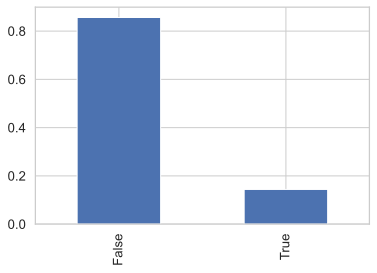

In [95]:
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

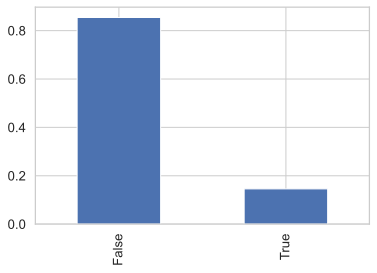

In [96]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [97]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [98]:
df_tr.shape

(634, 6)

In [99]:
foods_df.columns[:10]

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at'],
      dtype='object')

In [100]:
### 7. Apply one-hot-encoding on food group and subgroup columns 

In [101]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [102]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [103]:
ohe.fit(df_tr[cat_feature_columns])
X_tr = ohe.transform(df_tr[cat_feature_columns])
X_val = ohe.transform(df_val[cat_feature_columns])
X_te  = ohe.transform(df_test[cat_feature_columns])

In [104]:
df_val

id                                name     food_group food_subgroup  \
982  1015.0                          monk fruit         Fruits       Berries   
239   240.0                     japanese walnut           Nuts          Nuts   
492   504.0          salmonidae (salmon, trout)  Aquatic foods        Fishes   
491   503.0                         towel gourd         Gourds        Gourds   
384   390.0                   japanese chestnut           Nuts          Nuts   
..      ...                                 ...            ...           ...   
558   573.0                               tinda         Gourds        Gourds   
608   623.0  cetacea (dolphin, porpoise, whale)  Aquatic foods     Cetaceans   
979  1012.0                              wampee         Fruits       Berries   
601   616.0                               kombu  Aquatic foods       Seaweed   
550   565.0                           enokitake     Vegetables    Vegetables   

    food_type in_some_cocktail  
982    Type 1            False  
239    Type 1            False  
492    Type 1            False  
491    Type 1            False  
384    Type 1            False  
..        ...              ...  
558    Type 1            False  
608    Type 1            False  
979    Type 1            False  
601    Type 1            False  
550    Type 1            False  

[159 rows x 6 columns]

In [105]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Unclassified',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Candies', 'x1_Caprae', 'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Dru

In [106]:
len(ohe_column_names)

111

In [107]:
X_tr.shape

(634, 111)

In [108]:
X_val.shape

(159, 111)

In [109]:
X_te.shape

(199, 111)

In [110]:
X_tr[:10, :10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [111]:
X_tr[:10, -10:]

array([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [112]:
ohe_column_names[20]

'x0_Unclassified'

In [113]:
X_tr[:, 20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [114]:
import numpy as np
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([20])

In [115]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [116]:
import numpy as np
X_tr= np.delete(X_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [117]:
X_val= np.delete(X_val, x0_delete_item_index,  axis=1)
X_te= np.delete(X_te, x0_delete_item_index,  axis=1)

In [118]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Candies', 'x1_Caprae', 'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
       'x1_Fa

Delete the column (`x1_Unclassified`) of the second ohe categorical feature
and delete it in the column name list

In [119]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

102

In [120]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [121]:
X_tr= np.delete(X_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [122]:
X_val= np.delete(X_val, x1_delete_item_index,  axis=1)
X_te= np.delete(X_te, x1_delete_item_index,  axis=1)

In [123]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [124]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

108

In [125]:
X_tr= np.delete(X_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [126]:
X_val= np.delete(X_val, x2_delete_item_index,  axis=1)
X_te= np.delete(X_te, x2_delete_item_index,  axis=1)

In [127]:
assert X_tr.shape[1] == X_val.shape[1] == X_te.shape[1] == len(ohe_column_names)

In [128]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Candies', 'x1_Caprae', 'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
       'x1_Fa

In [129]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_te = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [130]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_te.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
#y_tr

In [131]:
X_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Utility functions

In [132]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

### 8. Logistic regression on train set

### Categorical features

In [133]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

from sklearn.metrics import confusion_matrix

In [134]:
X_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [135]:
label_tr

Cocktail_ingredient
27                     0
378                    0
142                    0
61                     0
351                    0
..                   ...
173                    0
372                    0
678                    0
275                    1
819                    0

[634 rows x 1 columns]

In [136]:
logit = LogisticRegression(C = 0.1)
logit.fit(X_tr, label_tr)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, label_val)))

The score for logistic regression is
Training:  87.07%
Validation set:  86.16%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [137]:
logit.predict_proba(X_tr)

array([[0.92888115, 0.07111885],
       [0.92888115, 0.07111885],
       [0.75929736, 0.24070264],
       ...,
       [0.8481334 , 0.1518666 ],
       [0.5239431 , 0.4760569 ],
       [0.86809729, 0.13190271]])

In [138]:
thresh = .20

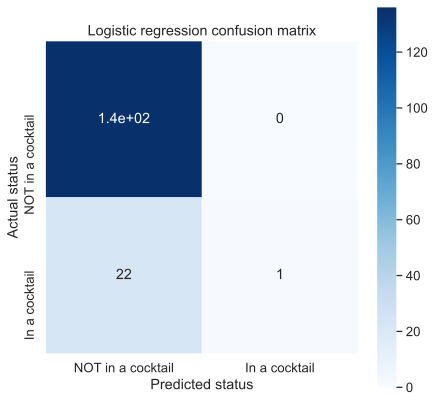

In [139]:
plt.rcParams['figure.figsize']=7,7

status = ['NOT in a cocktail', 'In a cocktail']

# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_val, logit.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=status,
           yticklabels=status)

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_cocktail_ingredient")

In [140]:
lm_weak_reg = LogisticRegression(C = 25)  # C = regularization strength; smaller numbers are stronger
lm_weak_reg.fit(X_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=25)

In [141]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix(model, threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [142]:
print("The score for logistic regression (weak regularization) is")
print("Training: {:6.2f}%".format(100*lm_weak_reg.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*lm_weak_reg.score(X_val, label_val)))

The score for logistic regression (weak regularization) is
Training:  91.80%
Validation set:  88.68%


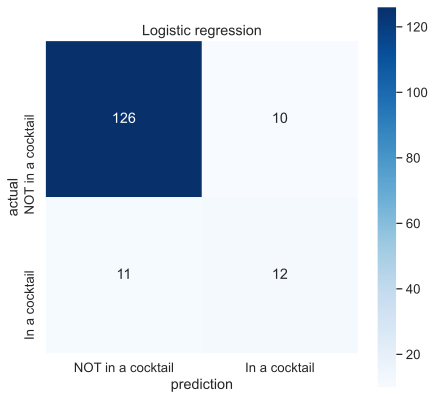

In [143]:
make_confusion_matrix(logit, thresh, model_type="Logistic regression")

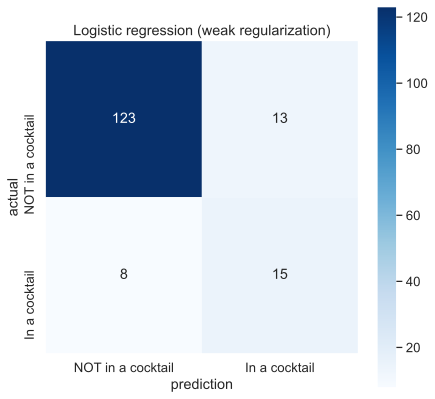

In [144]:

make_confusion_matrix(lm_weak_reg, thresh, model_type="Logistic regression (weak regularization)")

In [145]:
df_val

id                                name     food_group food_subgroup  \
982  1015.0                          monk fruit         Fruits       Berries   
239   240.0                     japanese walnut           Nuts          Nuts   
492   504.0          salmonidae (salmon, trout)  Aquatic foods        Fishes   
491   503.0                         towel gourd         Gourds        Gourds   
384   390.0                   japanese chestnut           Nuts          Nuts   
..      ...                                 ...            ...           ...   
558   573.0                               tinda         Gourds        Gourds   
608   623.0  cetacea (dolphin, porpoise, whale)  Aquatic foods     Cetaceans   
979  1012.0                              wampee         Fruits       Berries   
601   616.0                               kombu  Aquatic foods       Seaweed   
550   565.0                           enokitake     Vegetables    Vegetables   

    food_type in_some_cocktail  
982    Type 1            False  
239    Type 1            False  
492    Type 1            False  
491    Type 1            False  
384    Type 1            False  
..        ...              ...  
558    Type 1            False  
608    Type 1            False  
979    Type 1            False  
601    Type 1            False  
550    Type 1            False  

[159 rows x 6 columns]

In [146]:
label_predict = logit.predict(X_val)> thresh

In [147]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-147-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, food_group, food_subgroup, food_type, in_some_cocktail, predicted]
Index: []

In [148]:
false_neg = misclassified[misclassified['predicted'] == False]
false_neg

id                     name                  food_group  \
67    68.0                 turmeric            Herbs and Spices   
276  278.0           fortified wine                   Beverages   
741  767.0        coffee substitute                Baking goods   
178  179.0                   cloves            Herbs and Spices   
618  633.0                     eggs                        Eggs   
209  210.0      elliott's blueberry                      Fruits   
626  644.0                liquorice             Confectioneries   
368  374.0                    grape                      Fruits   
853  884.0      alcoholic beverages                   Beverages   
445  456.0                 rose hip            Herbs and Spices   
646  666.0                     salt                Baking goods   
172  173.0     garden tomato (var.)                  Vegetables   
52    53.0                     lime                      Fruits   
247  248.0  half-highbush blueberry                      Fruits   
335  341.0                  coconut                      Fruits   
841  871.0           condensed milk      Milk and milk products   
181  182.0               cocoa bean    Cocoa and cocoa products   
161  162.0            red raspberry                      Fruits   
57    58.0                   coffee  Coffee and coffee products   
937  970.0             coconut milk      Milk and milk products   
630  648.0                 vermouth                   Beverages   
629  647.0                port wine                   Beverages   

           food_subgroup food_type in_some_cocktail  predicted  
67                Spices    Type 1             True      False  
276      Fortified wines    Type 2             True      False  
741          Substitutes    Type 2             True      False  
178               Spices    Type 1             True      False  
618                 Eggs   Unknown             True      False  
209              Berries    Type 1             True      False  
626              Candies    Type 2             True      False  
368              Berries    Type 1             True      False  
853  Alcoholic beverages   Unknown             True      False  
445                Herbs    Type 1             True      False  
646           Seasonings    Type 2             True      False  
172           Vegetables    Type 1             True      False  
52                Citrus    Type 1             True      False  
247              Berries    Type 1             True      False  
335      Tropical fruits    Type 1             True      False  
841  Other milk products    Type 2             True      False  
181                Cocoa    Type 1             True      False  
161              Berries    Type 1             True      False  
57                Coffee    Type 1             True      False  
937  Other milk products    Type 1             True      False  
630      Fortified wines    Type 2             True      False  
629      Fortified wines    Type 2             True      False

In [149]:
feature_dict = dict(zip(ohe_column_names, *logit.coef_))
feature_dict
#ranked_features =sorted(feature_dict, key=feature_dict.__getitem__)
#ranked_features

{'x0_Animal foods': -0.20392539941377175,
 'x0_Aquatic foods': -0.5933829419897678,
 'x0_Baking goods': -0.06446779722542507,
 'x0_Beverages': 1.1212459596165718,
 'x0_Cereals and cereal products': -0.2273925455702809,
 'x0_Cocoa and cocoa products': 0.3607031246593127,
 'x0_Coffee and coffee products': 0.08497690089550827,
 'x0_Confectioneries': -0.12783611850059942,
 'x0_Dishes': -0.4177380355361829,
 'x0_Fats and oils': -0.015459865052900257,
 'x0_Fruits': 0.49838047564822835,
 'x0_Gourds': 0.056824058946377834,
 'x0_Herbs and Spices': 0.25052222082417386,
 'x0_Herbs and spices': -0.01356599293459697,
 'x0_Milk and milk products': 0.09626067986684149,
 'x0_Nuts': -0.0906449717197839,
 'x0_Pulses': -0.17631050178182817,
 'x0_Snack foods': -0.10447967372956372,
 'x0_Soy': -0.12744022177879888,
 'x0_Teas': 0.044918691540786995,
 'x0_Vegetables': -0.3334259338789039,
 'x1_Alcoholic beverages': 0.12302229258809069,
 'x1_American cuisine': -0.024401879256756465,
 'x1_Asian cuisine': -0.02

In [150]:
category_coef_df = pd.DataFrame(pd.Series(feature_dict).sort_values(ascending = False)).reset_index()
category_coef_df.rename(columns ={'index':'Category / subcategory', 0: 'Coefficient'}, inplace = True)


In [151]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Beverages', 'Category / subcategory'] = 'x1_Beverages (nonspecific)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cocoa and cocoa products', 'Category / subcategory'] = 'x1_Cocoa & cocoa products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Coffee and coffee products', 'Category / subcategory'] = 'x1_Coffee & coffee products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Teas', 'Category / subcategory'] = 'x1_Teas subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Herbs and Spices', 'Category / subcategory'] = 'x1_Herbs & Spices subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Soy', 'Category / subcategory'] = 'x1_Soy subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fats and oils', 'Category / subcategory'] = 'x1_Fats & oils subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cereals and cereal products', 'Category / subcategory'] = 'x1_Cereal & cereal products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Pulses', 'Category / subcategory'] = 'x1_Pulses subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Baking goods', 'Category / subcategory'] = 'x1_Baking goods subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Other beverages', 'Category / subcategory'] = 'x1_Other beverages subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Vegetables', 'Category / subcategory'] = 'x1_Vegetables subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fruits', 'Category / subcategory'] = 'x1_Fruits subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Milk and other milk products', 'Category / subcategory'] = 'x1_Milk & other milk products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Nuts', 'Category / subcategory'] = 'x1_Nuts subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Eggs', 'Category / subcategory'] = 'x1_Eggs subcategory'



In [152]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 1', 'Category / subcategory'] = 'x1_Type 1 (Unprocessed food)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 2', 'Category / subcategory'] = 'x1_Type 2 (Processed food)'

In [153]:

category_coef_df.replace({'Category / subcategory':r'x[012]_'}, {'Category / subcategory':''}, regex=True, inplace=True)

In [154]:
category_coef_df.tail(50)

Category / subcategory  Coefficient
58                    Lagomorphs    -0.021281
59                       Venison    -0.021281
60                  Other pulses    -0.021801
61                 Asian cuisine    -0.024402
62              American cuisine    -0.024402
63                   Herbal teas    -0.026381
64                        Doughs    -0.028675
65                       Seaweed    -0.029626
66                       Spreads    -0.031144
67                       Bovines    -0.031627
68               Tropical fruits    -0.036103
69                   Ground meat    -0.036225
70                  Pasta dishes    -0.036225
71               Fermented milks    -0.037312
72        Latin American cuisine    -0.047810
73               Mexican cuisine    -0.047810
74                          Peas    -0.053006
75               Leavened breads    -0.056020
76               Cereal products    -0.056020
77                      Mollusks    -0.057728
78                   Crustaceans    -0.059375
79       Beverages (nonspecific)    -0.060229
80                       Candies    -0.060746
81                  Baking goods    -0.064468
82                    Sandwiches    -0.070306
83                Fruit products    -0.074496
84                   Substitutes    -0.078890
85                  Other dishes    -0.081236
86                      Desserts    -0.088959
87                          Nuts    -0.090645
88              Nuts subcategory    -0.090645
89                   Flat breads    -0.094810
90                         Beans    -0.101503
91                   Snack foods    -0.104480
92                   Snack foods    -0.104480
93                       Poultry    -0.108255
94                  Soy products    -0.115951
95                           Soy    -0.127440
96               Confectioneries    -0.127836
97                        Pulses    -0.176311
98       Fermented milk products    -0.182112
99                  Animal foods    -0.203925
100  Cereals and cereal products    -0.227393
101    Type 1 (Unprocessed food)    -0.234738
102                Oilseed crops    -0.306835
103       Vegetables subcategory    -0.333426
104                   Vegetables    -0.333426
105                       Fishes    -0.395523
106                       Dishes    -0.417738
107                Aquatic foods    -0.593383

In [155]:
category_coef_df[category_coef_df['Category / subcategory'] =='Cocoa and cocoa products']

Category / subcategory  Coefficient
4  Cocoa and cocoa products     0.360703

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

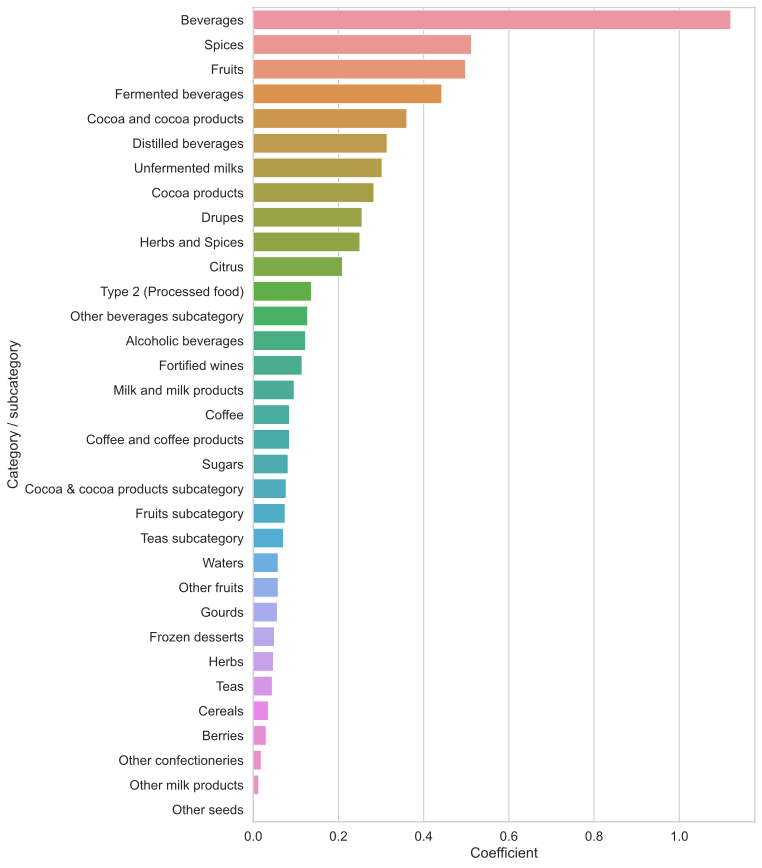

In [156]:
contributors = category_coef_df[category_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=9,15
sns.barplot(data=contributors, x='Coefficient', y='Category / subcategory', ci=None)

<BarContainer object of 34 artists>

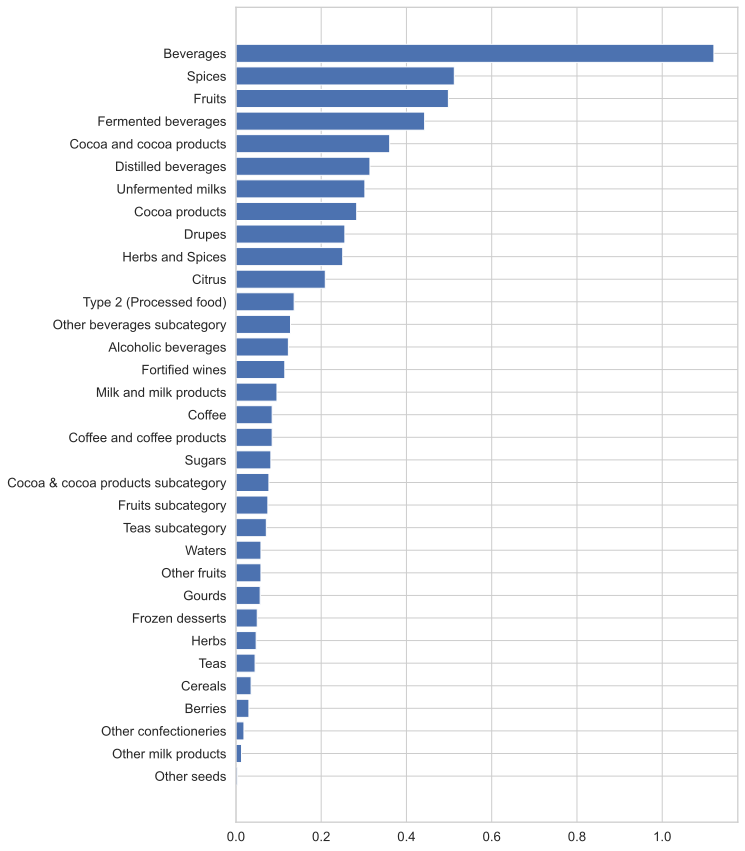

In [157]:
data= contributors.sort_values(by = 'Coefficient')
plt.barh(data['Category / subcategory'],data['Coefficient'])

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

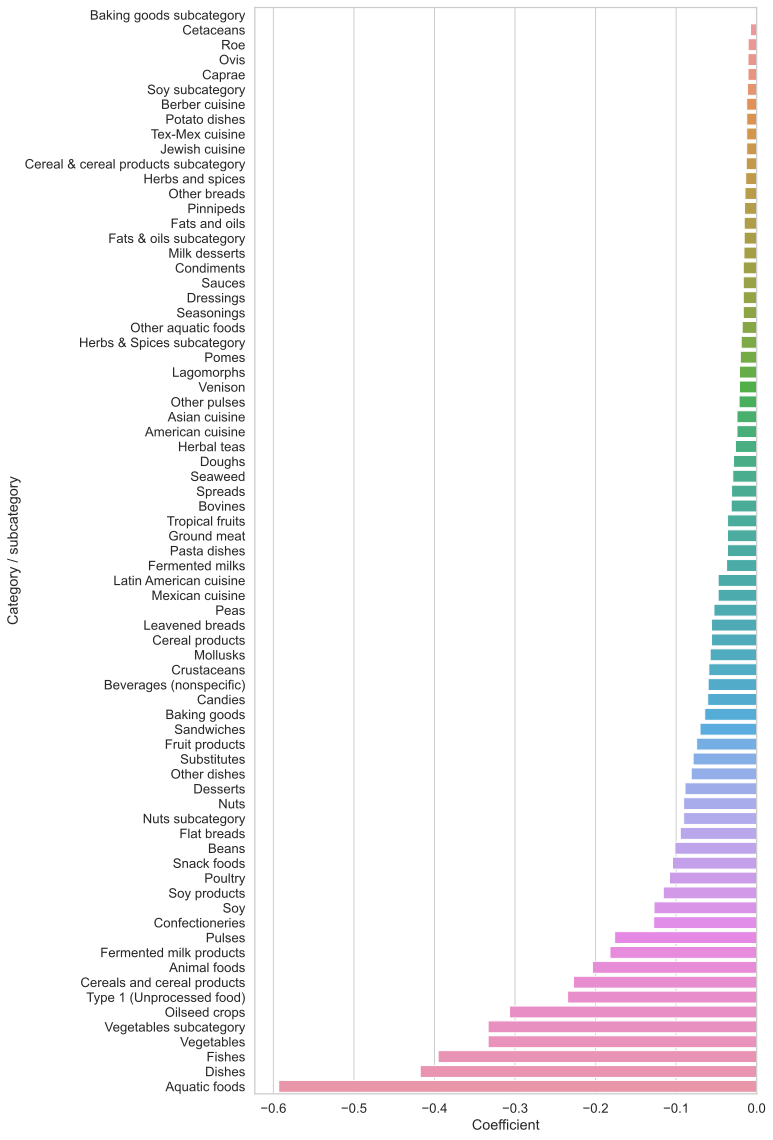

In [158]:
detractors = category_coef_df[category_coef_df['Coefficient'] < 0]
plt.rcParams['figure.figsize']=9,20
sns.barplot(data=detractors , x='Coefficient', y='Category / subcategory', ci=None)

#### KNN

In [159]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [160]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, label_val)))

The score for kNN is
Training:  91.01%
Validation set:  88.05%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


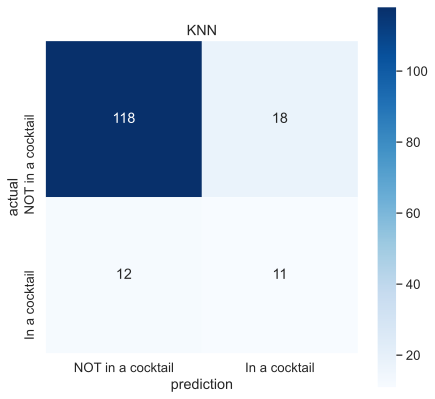

In [161]:
plt.rcParams['figure.figsize']=7,7
make_confusion_matrix(knn, model_type="KNN")

### Precision and Recall

#### Logistic

In [162]:
label_predict = logit.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 1.0000,   Recall: 0.0435


In [163]:
thresh = 0.2
label_predict = (logit.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.5455,   Recall: 0.5217


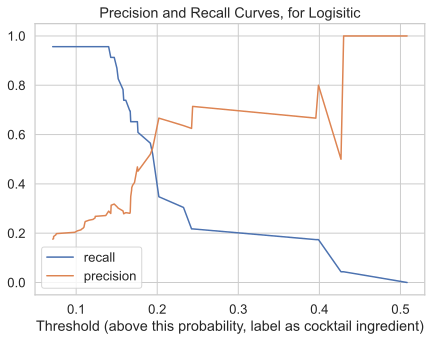

In [164]:
plt.rcParams['figure.figsize']=7,5

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [165]:
label_predict = knn.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.6667,   Recall: 0.3478


In [166]:
thresh = 0.2
label_predict = (knn.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.3793,   Recall: 0.4783


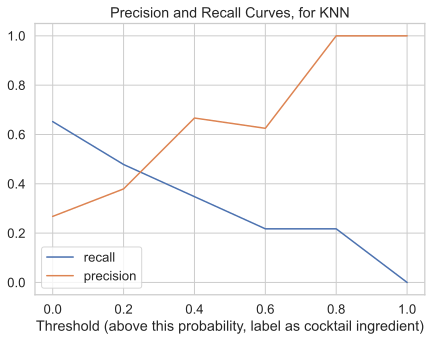

In [167]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [168]:
label_predict = logit.predict(X_val)
f1_score(label_val, label_predict)

0.08333333333333333

In [169]:
label_predict = (logit.predict_proba(X_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.5333333333333332

#### KNN

In [170]:

label_predict = knn.predict(X_val)
f1_score(label_val, label_predict)

0.4571428571428571

In [171]:
label_predict = (knn.predict_proba(X_val)[:, 1] > 0.17)
f1_score(label_val, label_predict)

0.379746835443038

### ROC curve

In [172]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_val)[:,1])

ROC AUC score, for Logistic =  0.8385549872122763


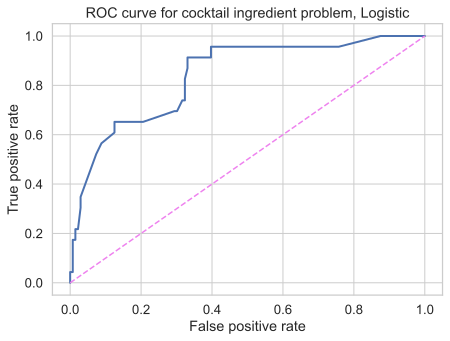

In [173]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_val)[:,1]))

In [174]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_val)[:,1])

ROC AUC score, for KNN =  0.7220268542199488


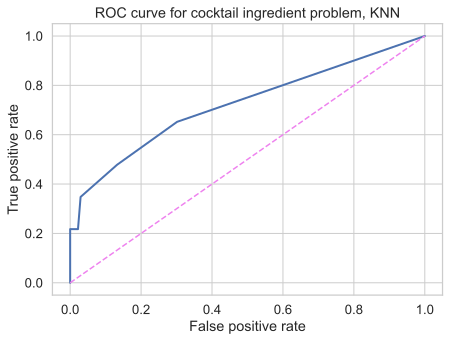

In [175]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_val)[:,1]))

### Uilitity function:   Log Loss Report

In [176]:
from sklearn.metrics import log_loss
def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
    print('\n')
    for m in model_names:
        tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
        val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
        diff = val_log_loss - tr_log_loss 
        print("Log-loss:\t{0:6.4f}\t{1:6.4f}\t\tdiff =\t{2:6.4f}\t{3}\n".format(tr_log_loss, val_log_loss, diff, m))


### Log Loss Cross-Entropy

In [178]:
log_loss_report(['logit',  'knn'], label_tr, X_tr, label_val, X_val)



Log-loss:	0.3201	0.3397		diff =	0.0195	logit

Log-loss:	1.2769	1.9186		diff =	0.6417	knn



### This above, from _Logistic_, is the best result obtained

## Consider the full set of 15000+ features

In [179]:
df_train_val, df_test = train_test_split(foods_df,
                                     test_size=0.2, 
                                     random_state=42, stratify=foods_df['in_some_cocktail'])

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

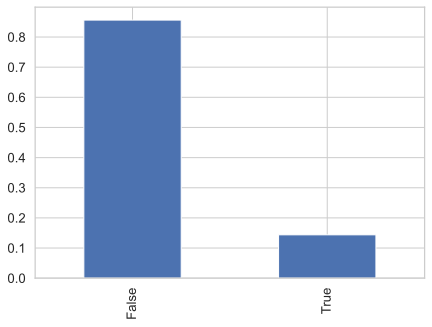

In [180]:
plt.rcParams['figure.figsize']=7,5
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

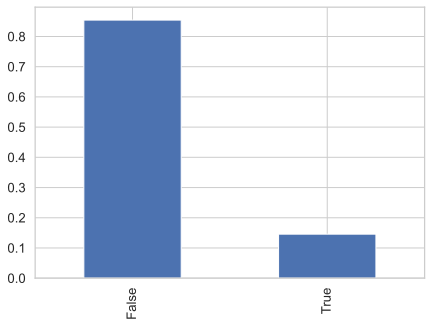

In [181]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [182]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [183]:
label_tr = df_tr['in_some_cocktail']
label_val = df_val['in_some_cocktail']
label_test = df_test['in_some_cocktail']

In [184]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [185]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [186]:
ohe.fit(df_tr[cat_feature_columns])
X_cat_tr = ohe.transform(df_tr[cat_feature_columns])
X_cat_val = ohe.transform(df_val[cat_feature_columns])
X_cat_test  = ohe.transform(df_test[cat_feature_columns])

In [187]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Unclassified', 'x0_Vegetables', 'x1_Alcoholic beverages',
       'x1_American cuisine', 'x1_Animal fats', 'x1_Asian cuisine',
       'x1_Baking goods', 'x1_Beans', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 

In [188]:
len(ohe_column_names)

119

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [189]:
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([21])

In [190]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [191]:
X_cat_tr= np.delete(X_cat_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [192]:
X_cat_val= np.delete(X_cat_val, x0_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x0_delete_item_index,  axis=1)

In [193]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
      

In [194]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (x1_Unclassified) of the second ohe categorical feature and delete it in the column name list

In [195]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

108

In [196]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [197]:
X_cat_tr= np.delete(X_cat_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [198]:
X_cat_val= np.delete(X_cat_val, x1_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x1_delete_item_index,  axis=1)

In [199]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

In [200]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [201]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

116

In [202]:
len(ohe_column_names)

117

In [203]:
ohe_column_names[x2_delete_item_index]

'x2_Unknown'

In [204]:
X_cat_tr= np.delete(X_cat_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [205]:
X_cat_val= np.delete(X_cat_val, x2_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x2_delete_item_index,  axis=1)

In [206]:
X_cat_tr.shape[1]

116

In [207]:
X_cat_val.shape[1]

116

In [208]:
X_cat_test.shape[1]

116

In [209]:
len(ohe_column_names)

116

In [210]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

In [211]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
      

In [212]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_test = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [213]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_test.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)

In [214]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [215]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns

In [216]:
cont_feature_columns

Index(['(E)-2-HEPTENAL_in_Calyx', '(E)-2-HEXENAL_in_Calyx',
       '(Z)-3-HEXENOL_in_Calyx', '1,4-CINEOLE_in_Calyx',
       '1,8-CINEOLE_in_Calyx', '1-HEXANOL_in_Calyx',
       '2,2-DIMETHYL-HEXANAL_in_Calyx', '2-ETHYL-FURAN_in_Calyx',
       '2-PENTYL-FURAN_in_Calyx',
       '3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit',
       ...
       'VIT-E_in_Sprout Seedling', 'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber'],
      dtype='object', length=15597)

In [217]:
df_tr.shape

(634, 15622)

In [218]:
df_tr[cont_feature_columns].fillna(0, inplace=True)
df_val[cont_feature_columns].fillna(0, inplace=True)
df_test[cont_feature_columns].fillna(0, inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [219]:
ss.fit(df_tr[cont_feature_columns])
X_scaled_tr = ss.transform(df_tr[cont_feature_columns])
X_scaled_val = ss.transform(df_val[cont_feature_columns])
X_scaled_test = ss.transform(df_test[cont_feature_columns])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [220]:
X_combo_tr = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr)], axis='columns')

In [221]:
X_combo_val = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val)], axis='columns')

In [222]:
X_combo_test = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test)], axis='columns')

In [223]:
X_combo_tr.fillna(0, inplace=True)
X_combo_val.fillna(0, inplace=True)
X_combo_test.fillna(0, inplace=True)

In [224]:
df_tr.head()

id                   name           name_scientific  \
286  288.0               allspice            Pimenta dioica   
700  725.0              snack bar                       NaN   
827  857.0               dripping                       NaN   
332  338.0  garland chrysanthemum  Chrysanthemum coronarium   
943  976.0               corn oil                       NaN   

                                           description  itis_id  \
286  Allspice, also called Jamaica pepper, pepper, ...  27247.0   
700                                                NaN      NaN   
827  Dripping, also known usually as beef dripping ...      NaN   
332  The garland chrysanthemum, Chrysanthemum coron...  35796.0   
943  Corn oil (maize oil) is oil extracted from the...      NaN   

              wikipedia_id picture_file_name picture_content_type  \
286               Allspice           288.jpg           image/jpeg   
700                    NaN           725.jpg           image/jpeg   
827               Dripping           857.jpg           image/jpeg   
332  Garland chrysanthemum           338.jpg           image/jpeg   
943                    NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
286           112761.0  2012-04-20 09:37:09 UTC  ...   
700            61349.0  2012-04-20 09:41:33 UTC  ...   
827            21805.0  2012-04-20 09:36:35 UTC  ...   
332           109697.0  2012-04-20 09:28:55 UTC  ...   
943                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
286                                NaN                                    NaN   
700                                NaN                                    NaN   
827                                NaN                                    NaN   
332                                NaN                                    NaN   
943                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
286                    NaN                       NaN   
700                    NaN                       NaN   
827                    NaN                       NaN   
332                    NaN                       NaN   
943                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
286                            NaN             NaN               NaN   
700                            NaN             NaN               NaN   
827                            NaN             NaN               NaN   
332                            NaN             NaN               NaN   
943                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
286              NaN             NaN             True  
700              NaN             NaN            False  
827              NaN             NaN            False  
332              NaN             NaN            False  
943              NaN             NaN            False  

[5 rows x 15622 columns]

In [225]:
X_combo_tr.shape

(634, 15713)

In [226]:
np.isnan(X_combo_tr).count()

0        634
1        634
2        634
3        634
4        634
        ... 
15592    634
15593    634
15594    634
15595    634
15596    634
Length: 15713, dtype: int64

In [227]:
#X_combo_tr

### Logistic

In [228]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [229]:
logit.coef_.shape

(1, 15713)

In [230]:
logit.coef_[len(ohe_column_names):len(ohe_column_names)+50]

array([], shape=(0, 15713), dtype=float64)

In [231]:
#logit_combo_tr_predictions = logit.predict_proba(X_combo_tr)

In [232]:
#logit_combo_val_predictions = logit.predict_proba(X_combo_val)

In [233]:
#select_df_columns = ['name','description','in_some_cocktail', 'CALCIUM_in_Fruit', 'IRON_in_Fruit','WATER_in_Leaf', 'PHOSPHORUS_in_Fruit']
#select_df_val = df_val[select_df_columns].fillna(0) 
#select_df_val
#select_val_proba_df = pd.concat([select_df_val, pd.DataFrame(logit_combo_tr_predictions)], axis = 1)
#select_val_proba_df = select_df_val.join(pd.DataFrame(logit_combo_val_predictions))


In [234]:
#select_val_proba_df

In [235]:
#combo_val_pred_df = pd.DataFrame(logit_combo_val_predictions).reset_index(drop=True)
#combo_val_pred_df = pd.concat([select_val_proba_df, combo_val_pred_df], axis=1, ignore_index=True)

In [236]:
#select_val_proba_df.to_csv('data/'+'select_val_proba_df.csv')

In [237]:
#combo_val_pred_df.to_csv('data/'+'combo_val_pred_df.csv')

In [238]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


In [239]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix_custom(model, X_val, label_val,  threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

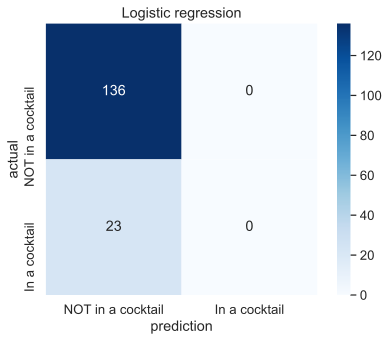

In [240]:
thresh = .22
make_confusion_matrix_custom(logit, X_combo_val, label_val, thresh, model_type="Logistic regression")

### KNN

In [241]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val, label_val)))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN is
Training:  90.85%
Validation set:  89.31%


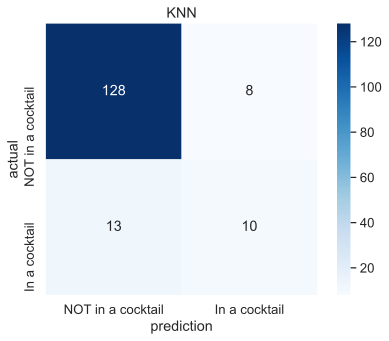

In [242]:
make_confusion_matrix_custom(knn, X_combo_val, label_val, thresh, model_type="KNN")

### Logistic

In [243]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.0

In [244]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

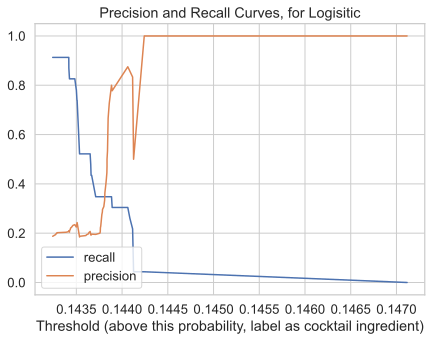

In [245]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [246]:
label_predict = knn.predict(X_combo_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.8750,   Recall: 0.3043


In [247]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3913,   Recall: 0.7826


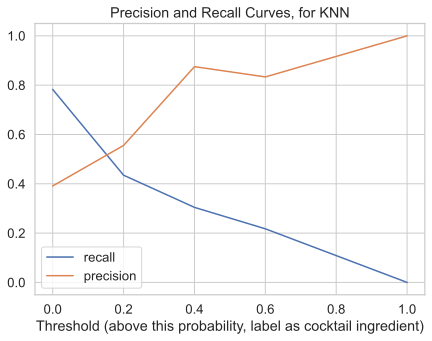

In [248]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [249]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.0

In [250]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.22)
f1_score(label_val, label_predict)

0.0

#### KNN

In [251]:
label_predict = knn.predict(X_combo_val)
f1_score(label_val, label_predict)

0.4516129032258065

In [252]:
label_predict = (knn.predict_proba(X_combo_val)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.5217391304347826

### Logistic

In [253]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val)[:,1])

ROC AUC score, for Logistic =  0.7065217391304348


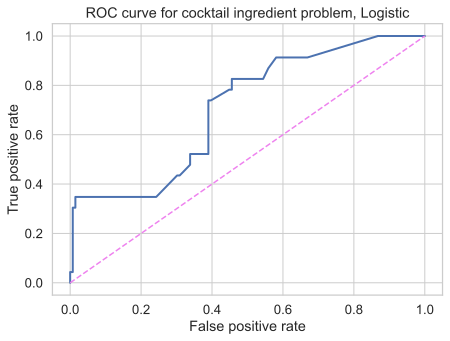

In [254]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val)[:,1]))

### KNN

In [255]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val)[:,1])

ROC AUC score, for KNN =  0.8171355498721228


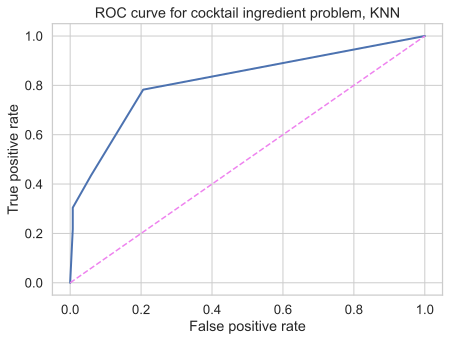

In [256]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val)[:,1]))

### Log Loss Cross-Entropy

In [257]:

log_loss_report(['logit','knn'], label_tr, X_combo_tr, label_val, X_combo_val)



Log-loss:	0.4110	0.4130		diff =	0.0020	logit

Log-loss:	0.8775	1.4586		diff =	0.5811	knn



## Consider just _continuous_ features

### Logistic

In [258]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [259]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [260]:
print("The score for Logistic is")
print("Training: {:6.2f}%".format( 100*logit.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*logit.score(np.array(X_scaled_val), np.array(label_val))))

The score for Logistic is
Training:  85.65%
Validation set:  85.53%


### KNN

In [261]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val, label_val)))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN is
Training:  85.65%
Validation set:  85.53%


### Naive Bayes

In [262]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()


In [263]:
nb.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Naive Bayes is")
print("Training: {:6.2f}%".format( 100*nb.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*nb.score(np.array(X_scaled_val), np.array(label_val))))


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The score for Naive Bayes is
Training:  18.45%
Validation set:  19.50%


### Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Might want to adjust tree depth

In [265]:
tree_depth = 3
d_tree = DecisionTreeClassifier(max_depth = tree_depth )
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8565445026178009

In [266]:
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8596858638743455

In [267]:
d_tree.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Decision Tree is")
print("Training: {:6.2f}%".format( 100*d_tree.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*d_tree.score(np.array(X_scaled_val), np.array(label_val))))


The score for Decision Tree is
Training:  86.59%
Validation set:  84.91%


### Random Forest

Might want to adjust the number of estimators

In [268]:
from sklearn.ensemble import RandomForestClassifier

n_estim = 2
randomforest = RandomForestClassifier(n_estimators = n_estim )
quick_test_afew_times(randomforest, X_scaled_tr, np.ravel(label_tr))


0.8513089005235603

In [269]:
randomforest.fit(np.array(X_scaled_tr), np.ravel(label_tr))
print("The score for Random Forest is")
print("Training: {:6.2f}%".format( 100*randomforest.score(np.array(X_scaled_tr), np.ravel(label_tr))))
print("Validation set: {:6.2f}%".format(100*randomforest.score(np.array(X_scaled_val), np.ravel(label_val))))


The score for Random Forest is
Training:  86.44%
Validation set:  85.53%


### XGBoost

**** Note: may be necessary to decrease the learning_rate and increase the min_child_weight to combat overfitting


In [270]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [271]:
from xgboost import XGBClassifier, plot_importance
import xgboost
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [272]:
gbm = xgboost.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

In [273]:
eval_set=[(X_scaled_tr,label_tr),(X_scaled_val,label_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_scaled_tr, label_tr, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False # to True to gives output log as below
                   )

[22:59:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [274]:
# predict using n_estimators with lowest validation error
rmse(gbm.predict(X_scaled_test, ntree_limit=gbm.best_ntree_limit),np.ravel(label_test)) 

0.3623234

In [275]:
xgb = XGBClassifier()
#xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_scaled_tr, np.ravel(label_tr))
#quick_test_afew_times(xgb, X_scaled_tr, np.ravel(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
dump_list = xgb.get_booster().get_dump()
num_trees = len(dump_list)
dump_list
xgb.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [277]:
label_pred = xgb.predict(X_scaled_val)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 85.53


In [278]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_scaled_val, label_val)))

The score for XGBoost is
Training:  86.44%
Validation set:  85.53%


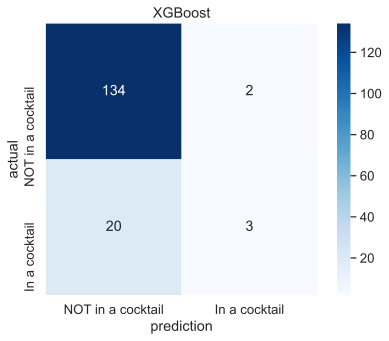

In [279]:
thresh = .2
make_confusion_matrix_custom(xgb, X_scaled_val, label_val, thresh, model_type="XGBoost")


In [280]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-280-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                name            name_scientific  \
400  406.0               lotus                    Nelumbo   
113  114.0              medlar         Mespilus germanica   
505  517.0     tea leaf willow              Salix pulchra   
714  739.0             topping                        NaN   
185  186.0           fenugreek  Trigonella foenum-graecum   
309  313.0  breadnut tree seed        Brosimum alicastrum   
364  370.0            fireweed    Chamerion angustifolium   
319  325.0          natal plum         Carissa macrocarpa   
557  572.0            sourdock              Rumex articus   
722  748.0        hibiscus tea        Hibiscus sabbariffa   
593  608.0           persimmon                  Diospyros   
699  724.0               icing                        NaN   
655  676.0    sugar substitute                        NaN   
929  962.0          red clover         Trifolium pratense   
285  287.0             alfalfa            Medicago sativa   
13    14.0       custard apple          Annona reticulata   
78    79.0    common buckwheat       Fagopyrum esculentum   
478  489.0               spelt            Triticum spelta   
428  437.0    common persimmon       Diospyros virginiana   
753  779.0   nutritional drink                        NaN   
481  493.0    strawberry guava        Psidium cattleianum   
952  985.0          sour cream                        NaN   
787  813.0               nance      Byrsonima crassifolia   
713  738.0      dulce de leche                        NaN   
642  662.0         chewing gum                        NaN   
691  714.0          buttermilk                        NaN   
9     10.0       lemon verbena          Aloysia triphylla   
107  108.0          lemon balm        Melissa officinalis   

                                           description   itis_id  \
400  Nelumbo is a genus of aquatic plants with larg...   18397.0   
113  Mespilus germanica, known as the medlar or com...  506235.0   
505  Salix pulchra is a species of flowering plant ...   22488.0   
714                                                NaN       NaN   
185  Fenugreek  (Trigonella foenum-graecum) is an a...  505590.0   
309  Brosimum alicastrum, the breadnut or Maya nut,...   19075.0   
364  Chamerion angustifolium, commonly known as Fir...  510756.0   
319  Carissa macrocarpa (Natal Plum), is a shrub na...  501290.0   
557  Rumex arcticus, commonly known as Arctic Dock ...   20935.0   
722  Hibiscus tea is the infusion made from the cal...   21617.0   
593  Persimmons are the edible fruit of a number of...   23853.0   
699  Icing, also called frosting in the United Stat...       NaN   
655  A sugar substitute is a food additive that dup...       NaN   
929  Red clover is a herbaceous, short-lived perenn...       NaN   
285  Alfalfa, Medicago sativa, also called lucerne,...  183623.0   
13   Custard apple, is a common name for a fruit, a...   18099.0   
78   Buckwheat (Fagopyrum esculentum) is a plant cu...  502589.0   
478  Spelt, also known as dinkel wheat, or hulled w...   42243.0   
428  Diospyros virginiana is a persimmon species co...   23855.0   
753  An energy drink is a type of beverage containi...       NaN   
481  Psidium cattleianum, named in honour of notabl...   27239.0   
952  Sour cream (American English) or soured cream ...       NaN   
787  Nance (also called craboo, kraabu, Savanna Ser...   29263.0   
713  Dulce de leche is a thick, creamy, caramel-lik...       NaN   
642  Chewing gum is a soft, cohesive substance inte...       NaN   
691  Buttermilk refers to a number of dairy drinks....       NaN   
9    Aloysia citrodora is a species of flowering pl...   32135.0   
107  Lemon balm (Melissa officinalis), not to be co...   32565.0   

                wikipedia_id picture_file_name picture_content_type  \
400                  Nelumbo           406.jpg           image/jpeg   
113                   Medlar           114.jpg           image/jpeg   
505            Salix pulchra           517.jpg      

In [281]:
false_pos.to_csv('data/XGBoost_cont_false_positives.csv')

In [282]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns
cont_feature_column_names = foods_df[cont_feature_columns].columns
cont_feature_column_names

Index(['(E)-2-HEPTENAL_in_Calyx', '(E)-2-HEXENAL_in_Calyx',
       '(Z)-3-HEXENOL_in_Calyx', '1,4-CINEOLE_in_Calyx',
       '1,8-CINEOLE_in_Calyx', '1-HEXANOL_in_Calyx',
       '2,2-DIMETHYL-HEXANAL_in_Calyx', '2-ETHYL-FURAN_in_Calyx',
       '2-PENTYL-FURAN_in_Calyx',
       '3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit',
       ...
       'VIT-E_in_Sprout Seedling', 'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber'],
      dtype='object', length=15597)

In [283]:
im=pd.DataFrame({'importance':xgb.feature_importances_,'var':cont_feature_columns})
im=im.sort_values(by='importance',ascending=False)
im.head()

importance                     var
158    0.524446  BETA-CAROTENE_in_Fruit
31     0.201275             ASH_in_Leaf
74     0.079327             FAT_in_Leaf
180    0.050741        THIAMIN_in_Fruit
181    0.043371          WATER_in_Fruit

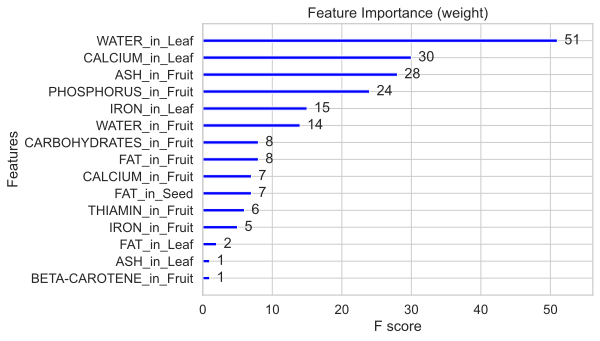

In [284]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
#mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')
plt.savefig('graphs/xgb_weight.svg', bbox_inches='tight')

In [285]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (gain)')
plt.savefig('graphs/xgb_gain.svg', bbox_inches='tight')

In [286]:

foods_df.iloc[:, 24:40]

(E)-2-HEPTENAL_in_Calyx  (E)-2-HEXENAL_in_Calyx  (Z)-3-HEXENOL_in_Calyx  \
0                        NaN                     NaN                     NaN   
1                        NaN                     NaN                     NaN   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                        NaN                     NaN                     NaN   
..                       ...                     ...                     ...   
987                      NaN                     NaN                     NaN   
988                      NaN                     NaN                     NaN   
989                      NaN                     NaN                     NaN   
990                      NaN                     NaN                     NaN   
991                      NaN                     NaN                     NaN   

     1,4-CINEOLE_in_Calyx  1,8-CINEOLE_in_Calyx  1-HEXANOL_in_Calyx  \
0                     NaN                   NaN                 NaN   
1                     NaN                   NaN                 NaN   
2                     NaN                   NaN                 NaN   
3                     NaN                   NaN                 NaN   
4                     NaN                   NaN                 NaN   
..                    ...                   ...                 ...   
987                   NaN                   NaN                 NaN   
988                   NaN                   NaN                 NaN   
989                   NaN                   NaN                 NaN   
990                   NaN                   NaN                 NaN   
991                   NaN                   NaN                 NaN   

     2,2-DIMETHYL-HEXANAL_in_Calyx  2-ETHYL-FURAN_in_Calyx  \
0                              NaN                     NaN   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   
..                             ...                     ...   
987                            NaN                     NaN   
988                            NaN                     NaN   
989                            NaN                     NaN   
990                            NaN                     NaN   
991                            NaN                     NaN   

     2-PENTYL-FURAN_in_Calyx  3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit  \
0                        NaN                                          NaN   
1                        NaN                                          NaN   
2                        NaN                                          NaN   
3                        NaN                                          NaN   
4                        NaN                                          NaN   
..                       ...                                          ...   
987                      NaN                                          NaN   
988                      NaN                                          NaN   
989                      NaN                                          NaN   
990                      NaN                                          NaN   
991                      NaN                                          NaN   

     3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
..                                          ...   
987                                         NaN   
988                                         NaN   
989                                         NaN   
990        

#### Logit coefficients

In [287]:

cont_feature_dict = dict(zip(cont_feature_column_names, *logit.coef_))
cont_coef_df = pd.DataFrame(pd.Series(cont_feature_dict).sort_values(ascending = False)).reset_index()
cont_coef_df.rename(columns ={'index':'Continuous features', 0: 'Coefficient'}, inplace = True)


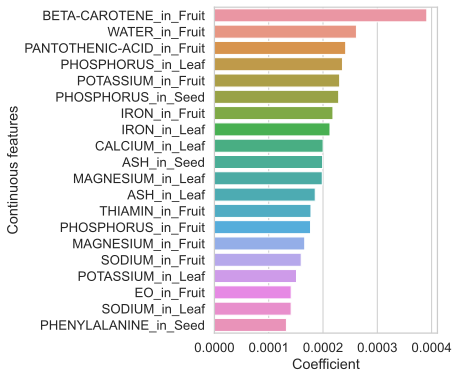

In [288]:
contributors = cont_coef_df[cont_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=4,6
#plt.tight_layout(pad=3)
sns.barplot(data=contributors.head(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_contributors.svg', bbox_inches='tight')

In [289]:
detractors = cont_coef_df[cont_coef_df['Coefficient'] < 0]
#fig = Figure()
plt.rcParams['figure.figsize']=4,6

sns.barplot(data=detractors.tail(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_detractors.svg', bbox_inches='tight')

In [290]:
# all_coef = cont_coef_df
# #fig = Figure()
# plt.rcParams['figure.figsize']=4,6

# g =sns.barplot(data=all_coef , x='Coefficient', y='Continuous features', ci=None)
# g.set(ylabel=None)
# plt.savefig('graphs/logit_cont_all_coef.png', bbox_inches='tight')

### Log loss cross entropy

In [291]:
log_loss_report(['logit', 'knn', 'nb', 'd_tree', 'randomforest','xgb'], label_tr, X_scaled_tr, label_val, X_scaled_val )



Log-loss:	0.4113	0.4131		diff =	0.0019	logit

Log-loss:	4.5923	4.5860		diff =	-0.0063	knn

Log-loss:	28.1649	27.8092		diff =	-0.3557	nb

Log-loss:	0.3927	0.8337		diff =	0.4410	d_tree

Log-loss:	0.3920	0.6157		diff =	0.2237	randomforest

Log-loss:	0.3975	0.3988		diff =	0.0013	xgb



### This result above, from _xgb_, is also comparable to the good result from Logistic noted above

# PCA on 15000+ features

In [292]:
from sklearn.decomposition import PCA

In [293]:
#pca_ = PCA(n_components=200, random_state=2020)
pca_ = PCA(n_components=200)

pca_.fit(X_combo_tr)
X_combo_tr_pca = pca_.transform(X_combo_tr)

In [294]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  100.0000000000001


In [295]:
sns.set_style("whitegrid")
#plt.style.use('ggplot')

In [296]:
plt.rcParams['figure.figsize']=6,4
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [297]:
components = 40

In [298]:
X_combo_tr_pca = X_combo_tr_pca[:, :components]

In [299]:
X_combo_val_pca = pca_.transform(X_combo_val)[:, :components]

In [300]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr_pca, label_tr)




/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [301]:
select_df_columns = ['name','description','in_some_cocktail']

In [302]:
select_df_val = df_val[select_df_columns]

In [303]:
logit_combo_val_pca_predictions = logit.predict_proba(X_combo_val_pca)

In [304]:
logit_combo_val_pca_predictions_df = pd.DataFrame(logit_combo_val_pca_predictions)

In [305]:
X_combo_val_pca_df = pd.DataFrame(X_combo_val_pca[:,:3])

In [306]:
select_df_val.to_csv('data/'+'select_df_val.csv')
logit_combo_val_pca_predictions_df.to_csv('data/'+'logit_combo_val_pca_predictions_df.csv')
X_combo_val_pca_df.to_csv('data/'+'X_combo_val_pca_df.csv')

In [307]:
select_df_tr = df_tr[select_df_columns]
logit_combo_tr_pca_predictions = logit.predict_proba(X_combo_tr_pca)
logit_combo_tr_pca_predictions_df = pd.DataFrame(logit_combo_tr_pca_predictions)
X_combo_tr_pca_df = pd.DataFrame(X_combo_tr_pca[:,:3])

In [308]:
select_df_tr.to_csv('data/'+'select_df_tr.csv')
logit_combo_tr_pca_predictions_df.to_csv('data/'+'logit_combo_tr_pca_predictions_df.csv')
X_combo_tr_pca_df.to_csv('data/'+'X_combo_tr_pca_df.csv')

In [309]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


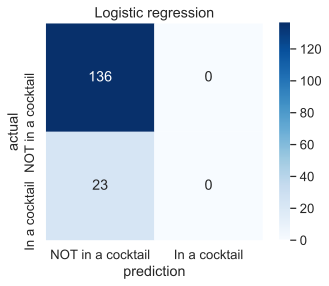

In [310]:
thresh = .2
make_confusion_matrix_custom(logit, X_combo_val_pca, label_val, thresh, model_type="Logistic regression")



In [311]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val_pca, label_val)))

The score for kNN is
Training:  90.06%
Validation set:  88.68%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


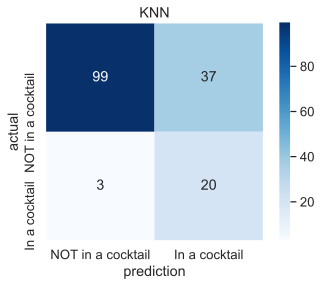

In [312]:
make_confusion_matrix_custom(knn, X_combo_val_pca, label_val, thresh, model_type="KNN")

In [313]:
label_predict = logit.predict(X_combo_val_pca)
f1_score(label_val, label_predict)

0.0

In [314]:
label_predict = (logit.predict_proba(X_combo_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

In [315]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [316]:
label_predict = knn.predict(X_combo_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.7273,   Recall: 0.3478


In [317]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3509,   Recall: 0.8696


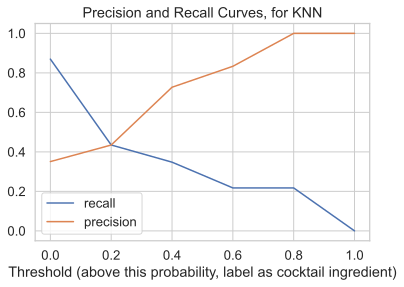

In [318]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [319]:
label_predict = (knn.predict_proba(X_combo_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.4999999999999999

In [320]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7078005115089514


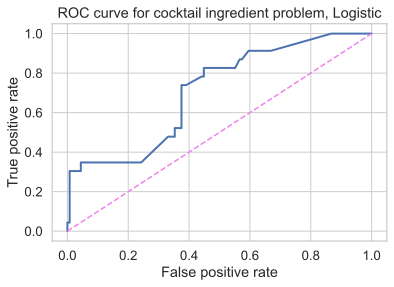

In [321]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val_pca)[:,1]))

In [322]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.8300831202046036


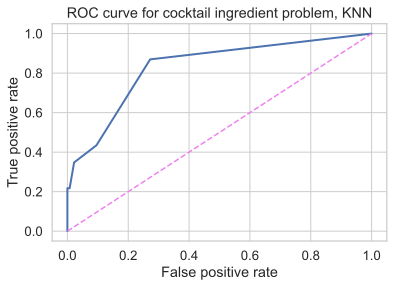

In [323]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val_pca)[:,1]))

### Log loss cross-entropy

In [324]:
log_loss_report(['logit', 'knn'], label_tr, X_combo_tr_pca, label_val, X_combo_val_pca)




Log-loss:	0.4110	0.4130		diff =	0.0019	logit

Log-loss:	0.3184	0.8615		diff =	0.5431	knn



### PCA on only the _continuous_ features



In [325]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [326]:
#pca_ = PCA(n_components=components, random_state=2020)
pca_ = PCA(n_components=200)
pca_.fit(X_scaled_tr)
X_scaled_tr_pca = pca_.transform(X_scaled_tr)

In [327]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  100.0


In [328]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

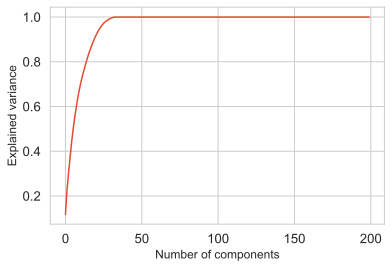

In [329]:
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [330]:
components = 40

In [331]:
X_scaled_tr_pca = X_scaled_tr_pca[:, :components]

In [332]:
X_scaled_val_pca = pca_.transform(X_scaled_val)[:, :components]


In [333]:
X_scaled_test_pca = pca_.transform(X_scaled_test)[:, :components]

## Logistic

In [334]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr_pca, label_tr)

print("The score for Logistic is")
print("Training: {:6.2f}%".format(100*logit.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_scaled_val_pca, label_val)))

The score for Logistic is
Training:  85.65%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [335]:
thresh = .2

In [336]:
label_predict = logit.predict(X_scaled_val_pca)> thresh

In [337]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-337-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, (E)-2-HEPTENAL_in_Calyx, (E)-2-HEXENAL_in_Calyx, (Z)-3-HEXENOL_in_Calyx, 1,4-CINEOLE_in_Calyx, 1,8-CINEOLE_in_Calyx, 1-HEXANOL_in_Calyx, 2,2-DIMETHYL-HEXANAL_in_Calyx, 2-ETHYL-FURAN_in_Calyx, 2-PENTYL-FURAN_in_Calyx, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Seed, 6,10,14-TRIMETHYL-2-PENTADECANONE_in_Calyx, ACETIC-ACID_in_Calyx, ACETIC-ACID_in_Fruit, ACETIC-ACID_in_Seed, ACIDS_in_Flower, ALPHA-FARNESENE_in_Calyx, ALPHA-TERPINEOL_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Fruit, ALPHA-TERPINYL-ACETATE_in_Leaf, ALPHA-TERPINYL-ACETATE_in_Seed, ALPHA-TOCOPHEROL_in_Seed, ALUMINUM_in_Flower, ANISALDEHYDE_in_Fruit, ANISALDEHYDE_in_Leaf, ANTHOCYANINS_in_Calyx, ASCORBIC-ACID_in_Flower, ASCORBIC-ACID_in_Fruit, ASH_in_Flower, ASH_in_Leaf, ASPARTIC-ACID_in_Plant, BENZALDEHYDE_in_Fruit, BENZYL-ALCOHOL_in_Fruit, BENZYL-ALCOHOL_in_Leaf, BETA-CAROTENE_in_Flower, BETA-CAROTENE_in_Leaf, BETA-SITOSTEROL_in_Seed, BUTYRIC-ACID_in_Fruit, CALCIUM-OXALATE_in_Fruit, CALCIUM_in_Flower, CALCIUM_in_Leaf, CALCIUM_in_Seed, CAMPESTEROL_in_Seed, CAPRYLIC-ACID_in_Fruit, CAPRYLIC-ACID_in_Seed, CARBOHYDRATES_in_Flower, CARBOHYDRATES_in_Leaf, CARBOHYDRATES_in_Seed, CARYOPHYLLENE_in_Calyx, CELLULOSE_in_Seed, CHOLESTEROL_in_Seed, CHROMIUM_in_Flower, CITRIC-ACID_in_Flower, CITRIC-ACID_in_Fruit, CLEROSTEROL_in_Seed, COBALT_in_Flower, COPPER_in_Flower, CYANIDIN-3,5-DIGLUCOSIDE_in_Flower, CYANIDIN-3-GLUCOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Flower, DELPHINIDIN-3-GLUCOSIDE_in_Calyx, DELPHINIDIN_in_Calyx, DELPHININ_in_Flower, DELTA-5-AVENASTEROL_in_Seed, DELTA-TOCOPHEROL_in_Seed, ERGOSTEROL_in_Seed, ETHANOL_in_Fruit, ETHANOL_in_Leaf, ETHANOL_in_Seed, EUGENOL_in_Calyx, FAT_in_Flower, FAT_in_Leaf, FAT_in_Seed, ...]
Index: []

[0 rows x 15623 columns]

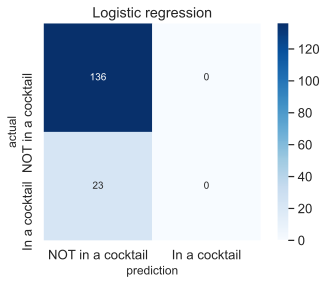

In [338]:
thresh=.17
make_confusion_matrix_custom(logit, X_scaled_val_pca, label_val, thresh, model_type="Logistic regression")


## KNN

In [339]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  85.65%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [340]:
thresh = .2

In [341]:
label_predict = knn.predict(X_scaled_val_pca)

In [342]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-342-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, (E)-2-HEPTENAL_in_Calyx, (E)-2-HEXENAL_in_Calyx, (Z)-3-HEXENOL_in_Calyx, 1,4-CINEOLE_in_Calyx, 1,8-CINEOLE_in_Calyx, 1-HEXANOL_in_Calyx, 2,2-DIMETHYL-HEXANAL_in_Calyx, 2-ETHYL-FURAN_in_Calyx, 2-PENTYL-FURAN_in_Calyx, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Seed, 6,10,14-TRIMETHYL-2-PENTADECANONE_in_Calyx, ACETIC-ACID_in_Calyx, ACETIC-ACID_in_Fruit, ACETIC-ACID_in_Seed, ACIDS_in_Flower, ALPHA-FARNESENE_in_Calyx, ALPHA-TERPINEOL_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Fruit, ALPHA-TERPINYL-ACETATE_in_Leaf, ALPHA-TERPINYL-ACETATE_in_Seed, ALPHA-TOCOPHEROL_in_Seed, ALUMINUM_in_Flower, ANISALDEHYDE_in_Fruit, ANISALDEHYDE_in_Leaf, ANTHOCYANINS_in_Calyx, ASCORBIC-ACID_in_Flower, ASCORBIC-ACID_in_Fruit, ASH_in_Flower, ASH_in_Leaf, ASPARTIC-ACID_in_Plant, BENZALDEHYDE_in_Fruit, BENZYL-ALCOHOL_in_Fruit, BENZYL-ALCOHOL_in_Leaf, BETA-CAROTENE_in_Flower, BETA-CAROTENE_in_Leaf, BETA-SITOSTEROL_in_Seed, BUTYRIC-ACID_in_Fruit, CALCIUM-OXALATE_in_Fruit, CALCIUM_in_Flower, CALCIUM_in_Leaf, CALCIUM_in_Seed, CAMPESTEROL_in_Seed, CAPRYLIC-ACID_in_Fruit, CAPRYLIC-ACID_in_Seed, CARBOHYDRATES_in_Flower, CARBOHYDRATES_in_Leaf, CARBOHYDRATES_in_Seed, CARYOPHYLLENE_in_Calyx, CELLULOSE_in_Seed, CHOLESTEROL_in_Seed, CHROMIUM_in_Flower, CITRIC-ACID_in_Flower, CITRIC-ACID_in_Fruit, CLEROSTEROL_in_Seed, COBALT_in_Flower, COPPER_in_Flower, CYANIDIN-3,5-DIGLUCOSIDE_in_Flower, CYANIDIN-3-GLUCOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Flower, DELPHINIDIN-3-GLUCOSIDE_in_Calyx, DELPHINIDIN_in_Calyx, DELPHININ_in_Flower, DELTA-5-AVENASTEROL_in_Seed, DELTA-TOCOPHEROL_in_Seed, ERGOSTEROL_in_Seed, ETHANOL_in_Fruit, ETHANOL_in_Leaf, ETHANOL_in_Seed, EUGENOL_in_Calyx, FAT_in_Flower, FAT_in_Leaf, FAT_in_Seed, ...]
Index: []

[0 rows x 15623 columns]

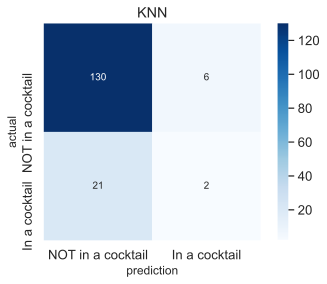

In [343]:
make_confusion_matrix_custom(knn, X_scaled_val_pca, label_val, thresh, model_type="KNN")

### Naive Bayes

In [344]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()

In [345]:
nb.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*nb.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*nb.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  18.93%
Validation set:  18.24%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Logistic 

In [346]:
label_predict = logit.predict(X_scaled_val_pca)
f1_score(label_val, label_predict)

0.0

In [347]:
label_predict = (logit.predict_proba(X_scaled_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

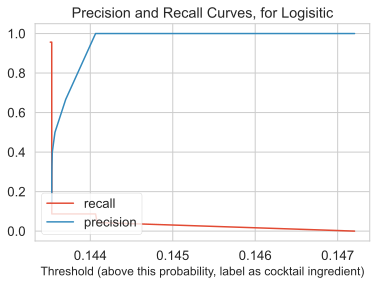

In [348]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [349]:
label_predict = knn.predict(X_scaled_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [350]:
thresh = 0.2
label_predict = (knn.predict_proba(X_scaled_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 1.0000,   Recall: 0.0435


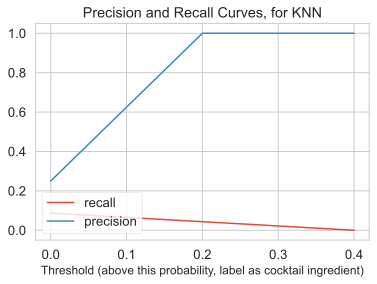

In [351]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [352]:
label_predict = (knn.predict_proba(X_scaled_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.12903225806451613

In [353]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])

ROC AUC score, for Logistic =  0.5195012787723785


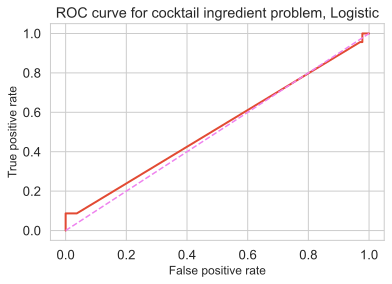

In [354]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_scaled_val_pca)[:,1]))

In [355]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.5223785166240409


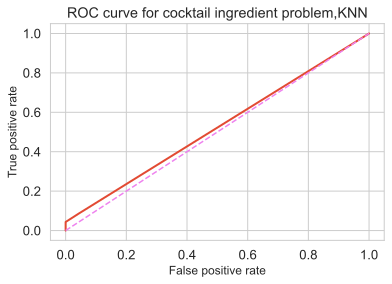

In [356]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem,KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_scaled_val_pca)[:,1]))

### Log loss cross entropy

In [357]:
log_loss_report(['logit', 'knn','nb'], label_tr, X_scaled_tr_pca, label_val, X_scaled_val_pca)

# print("Logistic")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])))
# print("KNN")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, knn.predict_proba(X_scaled_val_pca)[:, 1])))



Log-loss:	0.4113	0.4131		diff =	0.0019	logit

Log-loss:	4.5923	4.5860		diff =	-0.0063	knn

Log-loss:	6.8029	7.3540		diff =	0.5511	nb



### Combine categorical with continuous PCA

In [358]:
#X_combined_tr_pca  = np.concatenate( X_cat X_scaled_tr_pca 

In [359]:
X_combined_tr_pca = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr_pca)], axis='columns')

X_combined_val_pca = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val_pca)], axis='columns')

X_combined_test_pca = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test_pca)], axis='columns')

#### Logistic 

In [360]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combined_tr_pca, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [361]:
X_combined_tr_pca.shape

(634, 156)

In [362]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


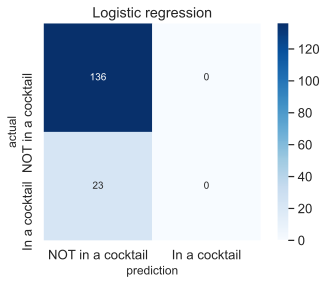

In [363]:
thresh = .2
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


#### KNN

In [364]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combined_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  90.85%
Validation set:  89.31%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


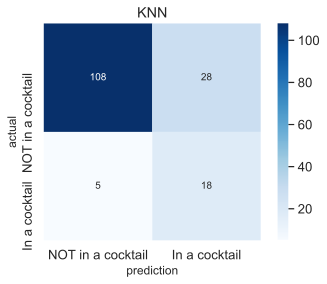

In [365]:
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")

#### XGBoost

In [366]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix

Rename columns to avoid repeated column names that arose

In [367]:
X_combined_tr_pca.columns[100:]

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
             23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
             36,  37,  38,  39],
           dtype='int64')

In [368]:
num_cat_features = len(ohe_column_names)

In [369]:
pca_column_numbering = ['pca_' + str(n) for n in range(components)]
cat_column_numbering = ['f'+str(n) for n in range(num_cat_features)]
feature_column_names = cat_column_numbering + pca_column_numbering
len(feature_column_names) 

156

In [370]:
type(X_combined_tr_pca)

pandas.core.frame.DataFrame

In [371]:
X_combined_tr_pca.columns = feature_column_names 
X_combined_tr_pca.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=156)

In [372]:
X_combined_val_pca.columns = feature_column_names 
X_combined_test_pca.columns = feature_column_names 


In [373]:
X_combined_test_pca.columns 

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=156)

 fit **XGBoost**

**** Note: it was necessary to _decrease_ the `learning_rate` and _increase_ the `min_child_weight` to combat overfitting

In [374]:

#clf = XGBClassifier()
xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_combined_tr_pca, label_tr)

[22:59:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.050000012, max_delta_step=0, max_depth=6,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [375]:
label_pred = xgb.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 85.53


In [376]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_combined_val_pca, label_val)))

The score for XGBoost is
Training:  85.65%
Validation set:  85.53%


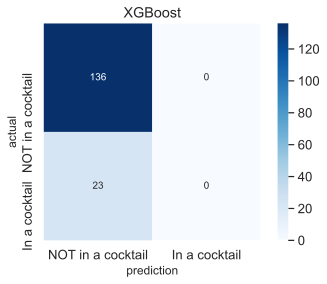

In [377]:
thresh = .4
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


In [378]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-378-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                name       name_scientific  \
173  174.0            eggplant     Solanum melongena   
309  313.0  breadnut tree seed   Brosimum alicastrum   
315  320.0           butternut       Juglans cinerea   
139  140.0           pistachio         Pistacia vera   
428  437.0    common persimmon  Diospyros virginiana   
481  493.0    strawberry guava   Psidium cattleianum   

                                           description   itis_id  \
173  The plant known in North America as the eggpla...   30446.0   
309  Brosimum alicastrum, the breadnut or Maya nut,...   19075.0   
315  Juglans cinerea, commonly known as Butternut o...   19250.0   
139  The pistachio, Pistacia vera in the Anacardiac...  506470.0   
428  Diospyros virginiana is a persimmon species co...   23855.0   
481  Psidium cattleianum, named in honour of notabl...   27239.0   

            wikipedia_id picture_file_name picture_content_type  \
173             Eggplant           174.jpg           image/jpeg   
309  Brosimum alicastrum           313.jpg           image/jpeg   
315      Juglans_cinerea           320.jpg           image/jpeg   
139            Pistachio           140.jpg           image/jpeg   
428     Common_Persimmon           437.jpg           image/jpeg   
481     Strawberry_guava           493.jpg           image/jpeg   

     picture_file_size       picture_updated_at  ...  \
173            43764.0  2012-04-20 09:30:03 UTC  ...   
309           183286.0  2012-04-20 09:35:11 UTC  ...   
315           194424.0  2012-04-20 09:38:06 UTC  ...   
139            83025.0  2012-04-20 09:30:19 UTC  ...   
428            48303.0  2012-04-20 09:42:59 UTC  ...   
481            44892.0  2012-04-20 09:33:34 UTC  ...   

     HOMOGENTISINIC-ACID_in_Sprout Seedling PIPECOLIC-ACID_in_Stem  \
173                                     NaN                    NaN   
309                                     NaN                    NaN   
315                                     NaN                    NaN   
139                                     NaN                    NaN   
428                                     NaN                    NaN   
481                                     NaN                    NaN   

    NEOGLUCOBRASSICIN_in_Seed TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  \
173                       NaN                            NaN             NaN   
309                       NaN                            NaN             NaN   
315                       NaN                            NaN             NaN   
139                       NaN                            NaN             NaN   
428                       NaN                            NaN             NaN   
481                       NaN                            NaN             NaN   

    ADENINE_in_Tuber  PHYTIN_in_Tuber  SUGARS_in_Tuber in_some_cocktail  \
173              NaN              NaN              NaN            False   
309              NaN              NaN              NaN            False   
315              NaN              NaN              NaN            False   
139              NaN              NaN              NaN            False   
428              NaN              NaN              NaN            False   
481              NaN              NaN              NaN            False   

    predicted  
173      True  
309      True  
315      True  
139      True  
428      True  
481      True  

[6 rows x 15623 columns]

In [379]:
false_pos.to_csv('data/XGBoost_cat_cont_false_positives.csv')

#### SVC (Support Vector Machines)

In [380]:
from sklearn.svm import LinearSVC, SVC

In [381]:
svt_clf = SVC().fit(np.array(X_combined_tr_pca), np.array(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [382]:
label_pred = svt_clf.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'SVctM Model Accuracy: {round(accuracy, 4)*100}')

SVctM Model Accuracy: 88.05


In [383]:
print("The score for SVCtM is")

print("Training: {:6.2f}%".format(100*svt_clf.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*svt_clf.score(X_combined_val_pca, label_val)))

The score for SVCtM is
Training:  91.01%
Validation set:  88.05%


In [384]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")


### Logistic

In [385]:
label_predict = logit.predict(X_combined_val_pca)
f1_score(label_val, label_predict)

0.0

In [386]:
label_predict = (logit.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

In [387]:
label_predict = logit.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))



/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Default threshold:
Precision: 0.0000,   Recall: 0.0000


In [388]:
thresh = 0.2
label_predict = (logit.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.0000,   Recall: 0.0000


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


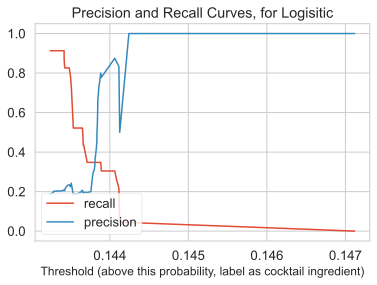

In [389]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [390]:
label_predict = knn.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.8750,   Recall: 0.3043


In [391]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3913,   Recall: 0.7826


In [392]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [393]:
label_predict = xgb.predict(X_combined_val_pca)
f1_score(label_val, label_predict)


0.0

In [394]:
label_predict = (xgb.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.1875

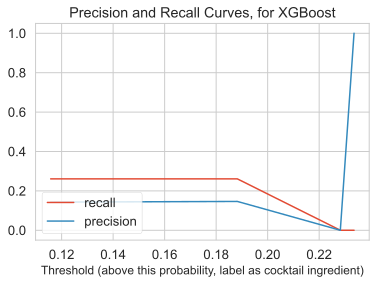

In [395]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### SVct M

In [396]:
X_combined_val_pca.shape

(159, 156)

In [397]:
# label_predict = svm.predict(np.array(X_combined_val_pca))
# f1_score(np.array(label_val), label_predict)

In [398]:
# label_predict = (svm.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
# f1_score(label_val, label_predict)

In [399]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

# precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1] )

# plt.figure(dpi=80)
# plt.plot(threshold_curve, recall_curve[1:], label='recall')
# plt.plot(threshold_curve, precision_curve[1:],label='precision')
# plt.legend(loc='lower left')
# plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
# plt.title('Precision and Recall Curves, for XGBoost');

### Logistic ROC

In [400]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7065217391304348


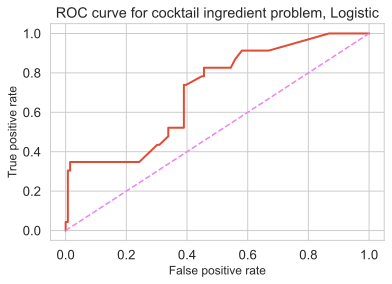

In [401]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [402]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])      

ROC AUC score, for Logistic =  0.8171355498721228


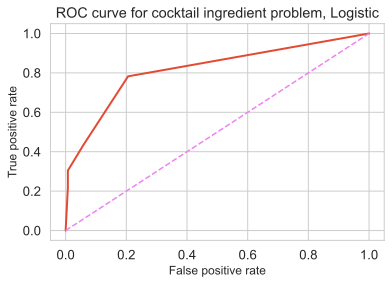

In [403]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

### XGBoost

In [404]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.5640984654731458


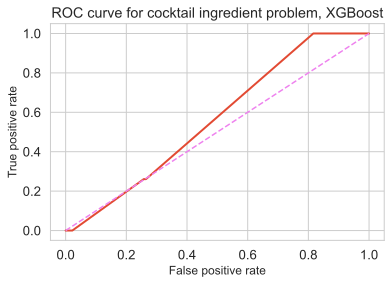

In [405]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

### Log loss cross entropy

In [406]:
log_loss_report(['logit', 'knn','xgb'], label_tr, X_combined_tr_pca, label_val, X_combined_val_pca)# fpr, tpr, thresholds = roc_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1])



Log-loss:	0.4110	0.4130		diff =	0.0020	logit

Log-loss:	0.8775	1.4586		diff =	0.5811	knn

Log-loss:	0.3973	0.4197		diff =	0.0224	xgb



# Oversampling

In [407]:
# Now add some random oversampling of the minority classes
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled, label_resampled = ros.fit_sample(np.array(X_combined_tr_pca),np.array(label_tr))

In [408]:
# Yay, balanced classes!
Counter(label_resampled)

Counter({1: 543, 0: 543})

In [409]:
#X_resampled = pd.DataFrame(X_resampled)
#X_resampled.columns = feature_column_names 

### Logistic

In [410]:
logit = LogisticRegression(C = .0003,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_resampled, label_resampled)


LogisticRegression(C=0.0003, max_iter=10000)

In [411]:
X_resampled.shape

(1086, 156)

In [412]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))


The score for logistic regression is
Training:  73.02%
Validation set:  64.15%


In [413]:
thresh = .5
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


### KNN

In [414]:
knn = KNeighborsClassifier(n_neighbors=8) # set number of neighbors to 20
knn.fit(X_resampled, label_resampled)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  85.64%
Validation set:  79.25%


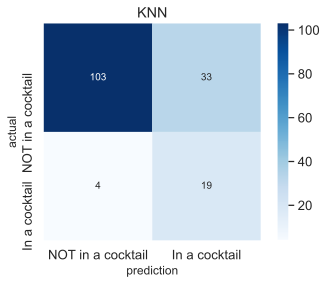

In [415]:
thresh = .5
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")



### XGBoost

In [416]:
#clf = XGBClassifier().fit(X_resampled, label_resampled)
xgb= XGBClassifier(learning_rate=0.001000012, min_child_weight=35 ).fit(X_resampled, label_resampled)
#clf = XGBClassifier(learning_rate=0.1000012, min_child_weight=17 ).fit(X_resampled, label_resampled)

[22:59:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [417]:
#X_combined_val_pca.columns 

In [418]:
label_pred = xgb.predict(np.array(X_combined_val_pca))
accuracy = accuracy_score(label_val, label_pred)

In [419]:
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(np.array(X_resampled), label_resampled)))
print("Validation set: {:6.2f}%".format(100*xgb.score(np.array(X_combined_val_pca), label_val)))


XGBoost Model Accuracy: 59.12
The score for XGBoost is
Training:  69.24%
Validation set:  59.12%


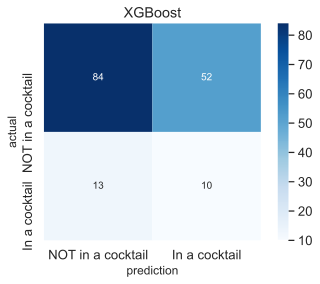

In [420]:
thresh = .5
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


### Logistic

In [421]:
label_predict = logit.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.2962962962962963

In [422]:
label_predict = (logit.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.2962962962962963

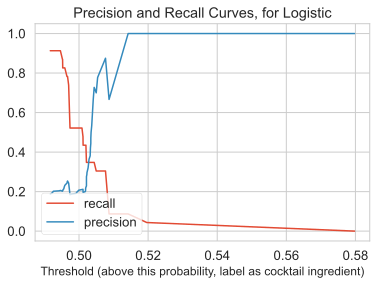

In [423]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logistic');

### KNN

In [424]:
label_predict = knn.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.5352112676056338

In [425]:
label_predict = (knn.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.5352112676056338

In [426]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [427]:
label_predict = xgb.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.23529411764705882

In [428]:
label_predict = (xgb.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.3)
f1_score(label_val, label_predict)


0.25274725274725274

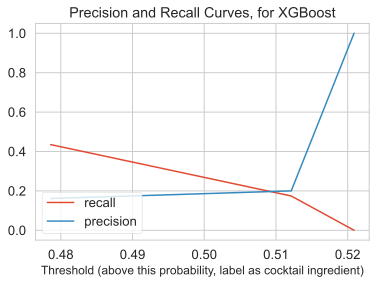

In [429]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### Logistic

In [430]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7135549872122763


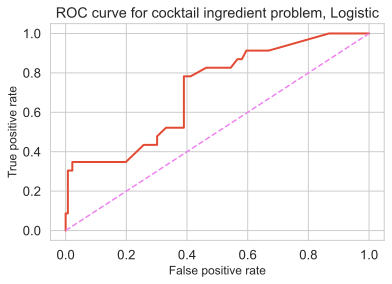

In [431]:


plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [432]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])

In [433]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

ROC AUC score, for KNN =  0.8356777493606138


In [434]:
sns.set_style("whitegrid")

### XGBoost

In [435]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.5338874680306905


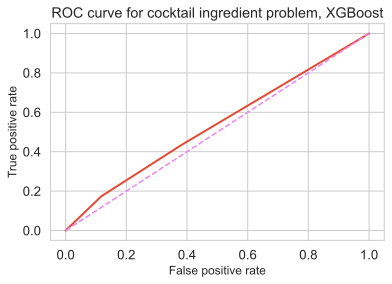

In [436]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

In [437]:
ohe_column_names_list = list(ohe_column_names)
ohe_column_names_list = [w.replace('x1_Type 1', 'x1_Type 2 (Unprocessed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_Type 2', 'x1_Type 2 (Processed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x0_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x2_', '') for w in ohe_column_names_list]

                         
                         

In [438]:

all_feature_names = ohe_column_names_list
all_feature_names.extend(list(cont_feature_column_names))
all_feature_names

['Animal foods',
 'Aquatic foods',
 'Baking goods',
 'Beverages',
 'Cereals and cereal products',
 'Cocoa and cocoa products',
 'Coffee and coffee products',
 'Confectioneries',
 'Dishes',
 'Eggs',
 'Fats and oils',
 'Fruits',
 'Gourds',
 'Herbs and Spices',
 'Herbs and spices',
 'Milk and milk products',
 'Nuts',
 'Pulses',
 'Snack foods',
 'Soy',
 'Teas',
 'Vegetables',
 'Alcoholic beverages',
 'American cuisine',
 'Animal fats',
 'Asian cuisine',
 'Baking goods',
 'Beans',
 'Berries',
 'Beverages',
 'Bovines',
 'Bread products',
 'Candies',
 'Caprae',
 'Cereal products',
 'Cereals',
 'Cetaceans',
 'Citrus',
 'Cocoa',
 'Cocoa and cocoa products',
 'Cocoa products',
 'Coffee',
 'Condiments',
 'Crustaceans',
 'Desserts',
 'Distilled beverages',
 'Doughs',
 'Dressings',
 'Drupes',
 'Eggs',
 'Equines',
 'Fats and oils',
 'Fermented beverages',
 'Fermented milk products',
 'Fermented milks',
 'Fishes',
 'Flat breads',
 'Fortified wines',
 'Frozen desserts',
 'Fruit products',
 'Fruits',
 

In [439]:
sns.set_style("whitegrid")

<AxesSubplot:title={'center':'Feature Importance (weight)'}, xlabel='F score', ylabel='Features'>

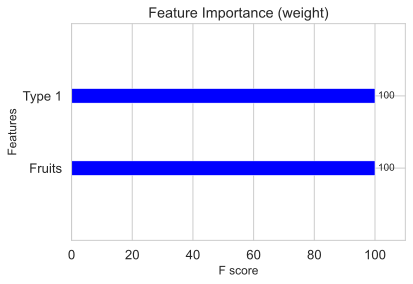

In [440]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')

In [441]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title = 'Feature Importance (gain)')

<AxesSubplot:title={'center':'Feature Importance (gain)'}, xlabel='F score', ylabel='Features'>

In [442]:
# def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
#     print('\n')
#     for m in model_names:
#         tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
#         val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
#         diff = val_log_loss - tr_log_loss 
#         print("Log-loss: {0:6.4f}  {1:6.4f}  diff=  {2:6.4f}    {3}\n".format(tr_log_loss, val_log_loss, diff, m))


In [443]:
log_loss_report(['logit','knn','xgb'],label_tr, X_combined_tr_pca, label_val, X_combined_val_pca  )




Log-loss:	0.6865	0.6860		diff =	-0.0005	logit

Log-loss:	0.8034	1.1719		diff =	0.3685	knn

Log-loss:	0.6794	0.6825		diff =	0.0031	xgb



## SVct m

In [444]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")